# 크롤링 프로젝트 - 네이버영화 '기생충' : 별점별 리뷰 텍스트 시각화

- WHY? : 영화 '기생충'에 대한 긍정적 & 부정적 인식 차이를 파악하기 위함
- HOW? : 네이버 영화의 별점에 따른 리뷰를 wordcloud 통한 시각화
- 별점이 10점인 리뷰와, 1점인 리뷰에서 자주쓰이는 단어의 긍정적/부정적 의견을 분석

## Step1. html 갖고와서 dictionary 자료형에 {'별점' : '리뷰'} 로 저장.
selenium 과 BeautifulSoup 사용하여 네이버 영화리뷰 - 기생충 페이지 html 긁어오고,
dictionary 에 저장하는 for문 작성.

In [1]:
from bs4 import BeautifulSoup
import urllib.request as req
from urllib.request import  urlopen
from selenium import webdriver
from tqdm import tqdm_notebook
import re

# 빈 dictionary 생성 -  key : 별점, values : 리뷰
dic = dict()

for문 작성 (3600페이지를 액세스 하므로, 예상 소요시간 함께 측정하여 출력)

In [2]:
for j in tqdm_notebook(range(1,3600), desc = '리뷰 페이지 크롤링'):
    url = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=161967&target=after&page={}".format(j)
    
    # html 내 '별점' 과 '리뷰' 가 함께 들어있는 태그 'div', 클래스 'scroe_result' 갖고오기
    html = req.urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')
    body = soup.find('div', class_='score_result')
    
    # star 변수에 별점, text 변수에 리뷰 넣기
    for i in soup.findAll('td', {'class':'title'}):
        star = i.find('em').get_text()
        text = re.sub('기생충별점 - 총 \d+점 중\d+|신고', '', i.get_text(strip = True))
                        # 정규표현식 : 각 리뷰마다 반복되는 문구 제거
        if star in dic.keys():
            dic[star] = dic[star] + ' ' +  text
        else:
            dic[star] = text

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [3]:
len(dic)

10

## Step2. 텍스트 필터링하기 위한 불용어 사전 작성
수집된 모든 리뷰의 전체 단어 파악

In [4]:
text = str(dic.values())

konlpy 로 형태소 분석 

In [5]:

from konlpy.tag import Okt
okt = Okt() 
pos = okt.pos(text, norm=True)

len(pos) # 전체 단어 갯수

181010

명사, 형용사만 추출하여 noun_adj에 리스트로 저장.

In [6]:
noun_adj = []
cn = 1
for i in pos:
    if i[1] in ('Noun','Adjective'):  # 명사, 형용사만 뽑기
        noun_adj.append(i[0])
    print("{}/{} 완료".format(cn, len(pos)))
    cn+=1

len(noun_adj) # 명사 형용사 갯수

1/181010 완료
2/181010 완료
3/181010 완료
4/181010 완료
5/181010 완료
6/181010 완료
7/181010 완료
8/181010 완료
9/181010 완료
10/181010 완료
11/181010 완료
12/181010 완료
13/181010 완료
14/181010 완료
15/181010 완료
16/181010 완료
17/181010 완료
18/181010 완료
19/181010 완료
20/181010 완료
21/181010 완료
22/181010 완료
23/181010 완료
24/181010 완료
25/181010 완료
26/181010 완료
27/181010 완료
28/181010 완료
29/181010 완료
30/181010 완료
31/181010 완료
32/181010 완료
33/181010 완료
34/181010 완료
35/181010 완료
36/181010 완료
37/181010 완료
38/181010 완료
39/181010 완료
40/181010 완료
41/181010 완료
42/181010 완료
43/181010 완료
44/181010 완료
45/181010 완료
46/181010 완료
47/181010 완료
48/181010 완료
49/181010 완료
50/181010 완료
51/181010 완료
52/181010 완료
53/181010 완료
54/181010 완료
55/181010 완료
56/181010 완료
57/181010 완료
58/181010 완료
59/181010 완료
60/181010 완료
61/181010 완료
62/181010 완료
63/181010 완료
64/181010 완료
65/181010 완료
66/181010 완료
67/181010 완료
68/181010 완료
69/181010 완료
70/181010 완료
71/181010 완료
72/181010 완료
73/181010 완료
74/181010 완료
75/181010 완료
76/181010 완료
77/181010 완료
78/18101

2233/181010 완료
2234/181010 완료
2235/181010 완료
2236/181010 완료
2237/181010 완료
2238/181010 완료
2239/181010 완료
2240/181010 완료
2241/181010 완료
2242/181010 완료
2243/181010 완료
2244/181010 완료
2245/181010 완료
2246/181010 완료
2247/181010 완료
2248/181010 완료
2249/181010 완료
2250/181010 완료
2251/181010 완료
2252/181010 완료
2253/181010 완료
2254/181010 완료
2255/181010 완료
2256/181010 완료
2257/181010 완료
2258/181010 완료
2259/181010 완료
2260/181010 완료
2261/181010 완료
2262/181010 완료
2263/181010 완료
2264/181010 완료
2265/181010 완료
2266/181010 완료
2267/181010 완료
2268/181010 완료
2269/181010 완료
2270/181010 완료
2271/181010 완료
2272/181010 완료
2273/181010 완료
2274/181010 완료
2275/181010 완료
2276/181010 완료
2277/181010 완료
2278/181010 완료
2279/181010 완료
2280/181010 완료
2281/181010 완료
2282/181010 완료
2283/181010 완료
2284/181010 완료
2285/181010 완료
2286/181010 완료
2287/181010 완료
2288/181010 완료
2289/181010 완료
2290/181010 완료
2291/181010 완료
2292/181010 완료
2293/181010 완료
2294/181010 완료
2295/181010 완료
2296/181010 완료
2297/181010 완료
2298/181010 완료
2299/18101

4099/181010 완료
4100/181010 완료
4101/181010 완료
4102/181010 완료
4103/181010 완료
4104/181010 완료
4105/181010 완료
4106/181010 완료
4107/181010 완료
4108/181010 완료
4109/181010 완료
4110/181010 완료
4111/181010 완료
4112/181010 완료
4113/181010 완료
4114/181010 완료
4115/181010 완료
4116/181010 완료
4117/181010 완료
4118/181010 완료
4119/181010 완료
4120/181010 완료
4121/181010 완료
4122/181010 완료
4123/181010 완료
4124/181010 완료
4125/181010 완료
4126/181010 완료
4127/181010 완료
4128/181010 완료
4129/181010 완료
4130/181010 완료
4131/181010 완료
4132/181010 완료
4133/181010 완료
4134/181010 완료
4135/181010 완료
4136/181010 완료
4137/181010 완료
4138/181010 완료
4139/181010 완료
4140/181010 완료
4141/181010 완료
4142/181010 완료
4143/181010 완료
4144/181010 완료
4145/181010 완료
4146/181010 완료
4147/181010 완료
4148/181010 완료
4149/181010 완료
4150/181010 완료
4151/181010 완료
4152/181010 완료
4153/181010 완료
4154/181010 완료
4155/181010 완료
4156/181010 완료
4157/181010 완료
4158/181010 완료
4159/181010 완료
4160/181010 완료
4161/181010 완료
4162/181010 완료
4163/181010 완료
4164/181010 완료
4165/18101

6594/181010 완료
6595/181010 완료
6596/181010 완료
6597/181010 완료
6598/181010 완료
6599/181010 완료
6600/181010 완료
6601/181010 완료
6602/181010 완료
6603/181010 완료
6604/181010 완료
6605/181010 완료
6606/181010 완료
6607/181010 완료
6608/181010 완료
6609/181010 완료
6610/181010 완료
6611/181010 완료
6612/181010 완료
6613/181010 완료
6614/181010 완료
6615/181010 완료
6616/181010 완료
6617/181010 완료
6618/181010 완료
6619/181010 완료
6620/181010 완료
6621/181010 완료
6622/181010 완료
6623/181010 완료
6624/181010 완료
6625/181010 완료
6626/181010 완료
6627/181010 완료
6628/181010 완료
6629/181010 완료
6630/181010 완료
6631/181010 완료
6632/181010 완료
6633/181010 완료
6634/181010 완료
6635/181010 완료
6636/181010 완료
6637/181010 완료
6638/181010 완료
6639/181010 완료
6640/181010 완료
6641/181010 완료
6642/181010 완료
6643/181010 완료
6644/181010 완료
6645/181010 완료
6646/181010 완료
6647/181010 완료
6648/181010 완료
6649/181010 완료
6650/181010 완료
6651/181010 완료
6652/181010 완료
6653/181010 완료
6654/181010 완료
6655/181010 완료
6656/181010 완료
6657/181010 완료
6658/181010 완료
6659/181010 완료
6660/18101

9209/181010 완료
9210/181010 완료
9211/181010 완료
9212/181010 완료
9213/181010 완료
9214/181010 완료
9215/181010 완료
9216/181010 완료
9217/181010 완료
9218/181010 완료
9219/181010 완료
9220/181010 완료
9221/181010 완료
9222/181010 완료
9223/181010 완료
9224/181010 완료
9225/181010 완료
9226/181010 완료
9227/181010 완료
9228/181010 완료
9229/181010 완료
9230/181010 완료
9231/181010 완료
9232/181010 완료
9233/181010 완료
9234/181010 완료
9235/181010 완료
9236/181010 완료
9237/181010 완료
9238/181010 완료
9239/181010 완료
9240/181010 완료
9241/181010 완료
9242/181010 완료
9243/181010 완료
9244/181010 완료
9245/181010 완료
9246/181010 완료
9247/181010 완료
9248/181010 완료
9249/181010 완료
9250/181010 완료
9251/181010 완료
9252/181010 완료
9253/181010 완료
9254/181010 완료
9255/181010 완료
9256/181010 완료
9257/181010 완료
9258/181010 완료
9259/181010 완료
9260/181010 완료
9261/181010 완료
9262/181010 완료
9263/181010 완료
9264/181010 완료
9265/181010 완료
9266/181010 완료
9267/181010 완료
9268/181010 완료
9269/181010 완료
9270/181010 완료
9271/181010 완료
9272/181010 완료
9273/181010 완료
9274/181010 완료
9275/18101

11205/181010 완료
11206/181010 완료
11207/181010 완료
11208/181010 완료
11209/181010 완료
11210/181010 완료
11211/181010 완료
11212/181010 완료
11213/181010 완료
11214/181010 완료
11215/181010 완료
11216/181010 완료
11217/181010 완료
11218/181010 완료
11219/181010 완료
11220/181010 완료
11221/181010 완료
11222/181010 완료
11223/181010 완료
11224/181010 완료
11225/181010 완료
11226/181010 완료
11227/181010 완료
11228/181010 완료
11229/181010 완료
11230/181010 완료
11231/181010 완료
11232/181010 완료
11233/181010 완료
11234/181010 완료
11235/181010 완료
11236/181010 완료
11237/181010 완료
11238/181010 완료
11239/181010 완료
11240/181010 완료
11241/181010 완료
11242/181010 완료
11243/181010 완료
11244/181010 완료
11245/181010 완료
11246/181010 완료
11247/181010 완료
11248/181010 완료
11249/181010 완료
11250/181010 완료
11251/181010 완료
11252/181010 완료
11253/181010 완료
11254/181010 완료
11255/181010 완료
11256/181010 완료
11257/181010 완료
11258/181010 완료
11259/181010 완료
11260/181010 완료
11261/181010 완료
11262/181010 완료
11263/181010 완료
11264/181010 완료
11265/181010 완료
11266/181010 완료
11267/18

13777/181010 완료
13778/181010 완료
13779/181010 완료
13780/181010 완료
13781/181010 완료
13782/181010 완료
13783/181010 완료
13784/181010 완료
13785/181010 완료
13786/181010 완료
13787/181010 완료
13788/181010 완료
13789/181010 완료
13790/181010 완료
13791/181010 완료
13792/181010 완료
13793/181010 완료
13794/181010 완료
13795/181010 완료
13796/181010 완료
13797/181010 완료
13798/181010 완료
13799/181010 완료
13800/181010 완료
13801/181010 완료
13802/181010 완료
13803/181010 완료
13804/181010 완료
13805/181010 완료
13806/181010 완료
13807/181010 완료
13808/181010 완료
13809/181010 완료
13810/181010 완료
13811/181010 완료
13812/181010 완료
13813/181010 완료
13814/181010 완료
13815/181010 완료
13816/181010 완료
13817/181010 완료
13818/181010 완료
13819/181010 완료
13820/181010 완료
13821/181010 완료
13822/181010 완료
13823/181010 완료
13824/181010 완료
13825/181010 완료
13826/181010 완료
13827/181010 완료
13828/181010 완료
13829/181010 완료
13830/181010 완료
13831/181010 완료
13832/181010 완료
13833/181010 완료
13834/181010 완료
13835/181010 완료
13836/181010 완료
13837/181010 완료
13838/181010 완료
13839/18

16156/181010 완료
16157/181010 완료
16158/181010 완료
16159/181010 완료
16160/181010 완료
16161/181010 완료
16162/181010 완료
16163/181010 완료
16164/181010 완료
16165/181010 완료
16166/181010 완료
16167/181010 완료
16168/181010 완료
16169/181010 완료
16170/181010 완료
16171/181010 완료
16172/181010 완료
16173/181010 완료
16174/181010 완료
16175/181010 완료
16176/181010 완료
16177/181010 완료
16178/181010 완료
16179/181010 완료
16180/181010 완료
16181/181010 완료
16182/181010 완료
16183/181010 완료
16184/181010 완료
16185/181010 완료
16186/181010 완료
16187/181010 완료
16188/181010 완료
16189/181010 완료
16190/181010 완료
16191/181010 완료
16192/181010 완료
16193/181010 완료
16194/181010 완료
16195/181010 완료
16196/181010 완료
16197/181010 완료
16198/181010 완료
16199/181010 완료
16200/181010 완료
16201/181010 완료
16202/181010 완료
16203/181010 완료
16204/181010 완료
16205/181010 완료
16206/181010 완료
16207/181010 완료
16208/181010 완료
16209/181010 완료
16210/181010 완료
16211/181010 완료
16212/181010 완료
16213/181010 완료
16214/181010 완료
16215/181010 완료
16216/181010 완료
16217/181010 완료
16218/18

18691/181010 완료
18692/181010 완료
18693/181010 완료
18694/181010 완료
18695/181010 완료
18696/181010 완료
18697/181010 완료
18698/181010 완료
18699/181010 완료
18700/181010 완료
18701/181010 완료
18702/181010 완료
18703/181010 완료
18704/181010 완료
18705/181010 완료
18706/181010 완료
18707/181010 완료
18708/181010 완료
18709/181010 완료
18710/181010 완료
18711/181010 완료
18712/181010 완료
18713/181010 완료
18714/181010 완료
18715/181010 완료
18716/181010 완료
18717/181010 완료
18718/181010 완료
18719/181010 완료
18720/181010 완료
18721/181010 완료
18722/181010 완료
18723/181010 완료
18724/181010 완료
18725/181010 완료
18726/181010 완료
18727/181010 완료
18728/181010 완료
18729/181010 완료
18730/181010 완료
18731/181010 완료
18732/181010 완료
18733/181010 완료
18734/181010 완료
18735/181010 완료
18736/181010 완료
18737/181010 완료
18738/181010 완료
18739/181010 완료
18740/181010 완료
18741/181010 완료
18742/181010 완료
18743/181010 완료
18744/181010 완료
18745/181010 완료
18746/181010 완료
18747/181010 완료
18748/181010 완료
18749/181010 완료
18750/181010 완료
18751/181010 완료
18752/181010 완료
18753/18

21687/181010 완료
21688/181010 완료
21689/181010 완료
21690/181010 완료
21691/181010 완료
21692/181010 완료
21693/181010 완료
21694/181010 완료
21695/181010 완료
21696/181010 완료
21697/181010 완료
21698/181010 완료
21699/181010 완료
21700/181010 완료
21701/181010 완료
21702/181010 완료
21703/181010 완료
21704/181010 완료
21705/181010 완료
21706/181010 완료
21707/181010 완료
21708/181010 완료
21709/181010 완료
21710/181010 완료
21711/181010 완료
21712/181010 완료
21713/181010 완료
21714/181010 완료
21715/181010 완료
21716/181010 완료
21717/181010 완료
21718/181010 완료
21719/181010 완료
21720/181010 완료
21721/181010 완료
21722/181010 완료
21723/181010 완료
21724/181010 완료
21725/181010 완료
21726/181010 완료
21727/181010 완료
21728/181010 완료
21729/181010 완료
21730/181010 완료
21731/181010 완료
21732/181010 완료
21733/181010 완료
21734/181010 완료
21735/181010 완료
21736/181010 완료
21737/181010 완료
21738/181010 완료
21739/181010 완료
21740/181010 완료
21741/181010 완료
21742/181010 완료
21743/181010 완료
21744/181010 완료
21745/181010 완료
21746/181010 완료
21747/181010 완료
21748/181010 완료
21749/18

23449/181010 완료
23450/181010 완료
23451/181010 완료
23452/181010 완료
23453/181010 완료
23454/181010 완료
23455/181010 완료
23456/181010 완료
23457/181010 완료
23458/181010 완료
23459/181010 완료
23460/181010 완료
23461/181010 완료
23462/181010 완료
23463/181010 완료
23464/181010 완료
23465/181010 완료
23466/181010 완료
23467/181010 완료
23468/181010 완료
23469/181010 완료
23470/181010 완료
23471/181010 완료
23472/181010 완료
23473/181010 완료
23474/181010 완료
23475/181010 완료
23476/181010 완료
23477/181010 완료
23478/181010 완료
23479/181010 완료
23480/181010 완료
23481/181010 완료
23482/181010 완료
23483/181010 완료
23484/181010 완료
23485/181010 완료
23486/181010 완료
23487/181010 완료
23488/181010 완료
23489/181010 완료
23490/181010 완료
23491/181010 완료
23492/181010 완료
23493/181010 완료
23494/181010 완료
23495/181010 완료
23496/181010 완료
23497/181010 완료
23498/181010 완료
23499/181010 완료
23500/181010 완료
23501/181010 완료
23502/181010 완료
23503/181010 완료
23504/181010 완료
23505/181010 완료
23506/181010 완료
23507/181010 완료
23508/181010 완료
23509/181010 완료
23510/181010 완료
23511/18

26042/181010 완료
26043/181010 완료
26044/181010 완료
26045/181010 완료
26046/181010 완료
26047/181010 완료
26048/181010 완료
26049/181010 완료
26050/181010 완료
26051/181010 완료
26052/181010 완료
26053/181010 완료
26054/181010 완료
26055/181010 완료
26056/181010 완료
26057/181010 완료
26058/181010 완료
26059/181010 완료
26060/181010 완료
26061/181010 완료
26062/181010 완료
26063/181010 완료
26064/181010 완료
26065/181010 완료
26066/181010 완료
26067/181010 완료
26068/181010 완료
26069/181010 완료
26070/181010 완료
26071/181010 완료
26072/181010 완료
26073/181010 완료
26074/181010 완료
26075/181010 완료
26076/181010 완료
26077/181010 완료
26078/181010 완료
26079/181010 완료
26080/181010 완료
26081/181010 완료
26082/181010 완료
26083/181010 완료
26084/181010 완료
26085/181010 완료
26086/181010 완료
26087/181010 완료
26088/181010 완료
26089/181010 완료
26090/181010 완료
26091/181010 완료
26092/181010 완료
26093/181010 완료
26094/181010 완료
26095/181010 완료
26096/181010 완료
26097/181010 완료
26098/181010 완료
26099/181010 완료
26100/181010 완료
26101/181010 완료
26102/181010 완료
26103/181010 완료
26104/18

28397/181010 완료
28398/181010 완료
28399/181010 완료
28400/181010 완료
28401/181010 완료
28402/181010 완료
28403/181010 완료
28404/181010 완료
28405/181010 완료
28406/181010 완료
28407/181010 완료
28408/181010 완료
28409/181010 완료
28410/181010 완료
28411/181010 완료
28412/181010 완료
28413/181010 완료
28414/181010 완료
28415/181010 완료
28416/181010 완료
28417/181010 완료
28418/181010 완료
28419/181010 완료
28420/181010 완료
28421/181010 완료
28422/181010 완료
28423/181010 완료
28424/181010 완료
28425/181010 완료
28426/181010 완료
28427/181010 완료
28428/181010 완료
28429/181010 완료
28430/181010 완료
28431/181010 완료
28432/181010 완료
28433/181010 완료
28434/181010 완료
28435/181010 완료
28436/181010 완료
28437/181010 완료
28438/181010 완료
28439/181010 완료
28440/181010 완료
28441/181010 완료
28442/181010 완료
28443/181010 완료
28444/181010 완료
28445/181010 완료
28446/181010 완료
28447/181010 완료
28448/181010 완료
28449/181010 완료
28450/181010 완료
28451/181010 완료
28452/181010 완료
28453/181010 완료
28454/181010 완료
28455/181010 완료
28456/181010 완료
28457/181010 완료
28458/181010 완료
28459/18

30521/181010 완료
30522/181010 완료
30523/181010 완료
30524/181010 완료
30525/181010 완료
30526/181010 완료
30527/181010 완료
30528/181010 완료
30529/181010 완료
30530/181010 완료
30531/181010 완료
30532/181010 완료
30533/181010 완료
30534/181010 완료
30535/181010 완료
30536/181010 완료
30537/181010 완료
30538/181010 완료
30539/181010 완료
30540/181010 완료
30541/181010 완료
30542/181010 완료
30543/181010 완료
30544/181010 완료
30545/181010 완료
30546/181010 완료
30547/181010 완료
30548/181010 완료
30549/181010 완료
30550/181010 완료
30551/181010 완료
30552/181010 완료
30553/181010 완료
30554/181010 완료
30555/181010 완료
30556/181010 완료
30557/181010 완료
30558/181010 완료
30559/181010 완료
30560/181010 완료
30561/181010 완료
30562/181010 완료
30563/181010 완료
30564/181010 완료
30565/181010 완료
30566/181010 완료
30567/181010 완료
30568/181010 완료
30569/181010 완료
30570/181010 완료
30571/181010 완료
30572/181010 완료
30573/181010 완료
30574/181010 완료
30575/181010 완료
30576/181010 완료
30577/181010 완료
30578/181010 완료
30579/181010 완료
30580/181010 완료
30581/181010 완료
30582/181010 완료
30583/18

33022/181010 완료
33023/181010 완료
33024/181010 완료
33025/181010 완료
33026/181010 완료
33027/181010 완료
33028/181010 완료
33029/181010 완료
33030/181010 완료
33031/181010 완료
33032/181010 완료
33033/181010 완료
33034/181010 완료
33035/181010 완료
33036/181010 완료
33037/181010 완료
33038/181010 완료
33039/181010 완료
33040/181010 완료
33041/181010 완료
33042/181010 완료
33043/181010 완료
33044/181010 완료
33045/181010 완료
33046/181010 완료
33047/181010 완료
33048/181010 완료
33049/181010 완료
33050/181010 완료
33051/181010 완료
33052/181010 완료
33053/181010 완료
33054/181010 완료
33055/181010 완료
33056/181010 완료
33057/181010 완료
33058/181010 완료
33059/181010 완료
33060/181010 완료
33061/181010 완료
33062/181010 완료
33063/181010 완료
33064/181010 완료
33065/181010 완료
33066/181010 완료
33067/181010 완료
33068/181010 완료
33069/181010 완료
33070/181010 완료
33071/181010 완료
33072/181010 완료
33073/181010 완료
33074/181010 완료
33075/181010 완료
33076/181010 완료
33077/181010 완료
33078/181010 완료
33079/181010 완료
33080/181010 완료
33081/181010 완료
33082/181010 완료
33083/181010 완료
33084/18

35828/181010 완료
35829/181010 완료
35830/181010 완료
35831/181010 완료
35832/181010 완료
35833/181010 완료
35834/181010 완료
35835/181010 완료
35836/181010 완료
35837/181010 완료
35838/181010 완료
35839/181010 완료
35840/181010 완료
35841/181010 완료
35842/181010 완료
35843/181010 완료
35844/181010 완료
35845/181010 완료
35846/181010 완료
35847/181010 완료
35848/181010 완료
35849/181010 완료
35850/181010 완료
35851/181010 완료
35852/181010 완료
35853/181010 완료
35854/181010 완료
35855/181010 완료
35856/181010 완료
35857/181010 완료
35858/181010 완료
35859/181010 완료
35860/181010 완료
35861/181010 완료
35862/181010 완료
35863/181010 완료
35864/181010 완료
35865/181010 완료
35866/181010 완료
35867/181010 완료
35868/181010 완료
35869/181010 완료
35870/181010 완료
35871/181010 완료
35872/181010 완료
35873/181010 완료
35874/181010 완료
35875/181010 완료
35876/181010 완료
35877/181010 완료
35878/181010 완료
35879/181010 완료
35880/181010 완료
35881/181010 완료
35882/181010 완료
35883/181010 완료
35884/181010 완료
35885/181010 완료
35886/181010 완료
35887/181010 완료
35888/181010 완료
35889/181010 완료
35890/18

37811/181010 완료
37812/181010 완료
37813/181010 완료
37814/181010 완료
37815/181010 완료
37816/181010 완료
37817/181010 완료
37818/181010 완료
37819/181010 완료
37820/181010 완료
37821/181010 완료
37822/181010 완료
37823/181010 완료
37824/181010 완료
37825/181010 완료
37826/181010 완료
37827/181010 완료
37828/181010 완료
37829/181010 완료
37830/181010 완료
37831/181010 완료
37832/181010 완료
37833/181010 완료
37834/181010 완료
37835/181010 완료
37836/181010 완료
37837/181010 완료
37838/181010 완료
37839/181010 완료
37840/181010 완료
37841/181010 완료
37842/181010 완료
37843/181010 완료
37844/181010 완료
37845/181010 완료
37846/181010 완료
37847/181010 완료
37848/181010 완료
37849/181010 완료
37850/181010 완료
37851/181010 완료
37852/181010 완료
37853/181010 완료
37854/181010 완료
37855/181010 완료
37856/181010 완료
37857/181010 완료
37858/181010 완료
37859/181010 완료
37860/181010 완료
37861/181010 완료
37862/181010 완료
37863/181010 완료
37864/181010 완료
37865/181010 완료
37866/181010 완료
37867/181010 완료
37868/181010 완료
37869/181010 완료
37870/181010 완료
37871/181010 완료
37872/181010 완료
37873/18

40634/181010 완료
40635/181010 완료
40636/181010 완료
40637/181010 완료
40638/181010 완료
40639/181010 완료
40640/181010 완료
40641/181010 완료
40642/181010 완료
40643/181010 완료
40644/181010 완료
40645/181010 완료
40646/181010 완료
40647/181010 완료
40648/181010 완료
40649/181010 완료
40650/181010 완료
40651/181010 완료
40652/181010 완료
40653/181010 완료
40654/181010 완료
40655/181010 완료
40656/181010 완료
40657/181010 완료
40658/181010 완료
40659/181010 완료
40660/181010 완료
40661/181010 완료
40662/181010 완료
40663/181010 완료
40664/181010 완료
40665/181010 완료
40666/181010 완료
40667/181010 완료
40668/181010 완료
40669/181010 완료
40670/181010 완료
40671/181010 완료
40672/181010 완료
40673/181010 완료
40674/181010 완료
40675/181010 완료
40676/181010 완료
40677/181010 완료
40678/181010 완료
40679/181010 완료
40680/181010 완료
40681/181010 완료
40682/181010 완료
40683/181010 완료
40684/181010 완료
40685/181010 완료
40686/181010 완료
40687/181010 완료
40688/181010 완료
40689/181010 완료
40690/181010 완료
40691/181010 완료
40692/181010 완료
40693/181010 완료
40694/181010 완료
40695/181010 완료
40696/18

42406/181010 완료
42407/181010 완료
42408/181010 완료
42409/181010 완료
42410/181010 완료
42411/181010 완료
42412/181010 완료
42413/181010 완료
42414/181010 완료
42415/181010 완료
42416/181010 완료
42417/181010 완료
42418/181010 완료
42419/181010 완료
42420/181010 완료
42421/181010 완료
42422/181010 완료
42423/181010 완료
42424/181010 완료
42425/181010 완료
42426/181010 완료
42427/181010 완료
42428/181010 완료
42429/181010 완료
42430/181010 완료
42431/181010 완료
42432/181010 완료
42433/181010 완료
42434/181010 완료
42435/181010 완료
42436/181010 완료
42437/181010 완료
42438/181010 완료
42439/181010 완료
42440/181010 완료
42441/181010 완료
42442/181010 완료
42443/181010 완료
42444/181010 완료
42445/181010 완료
42446/181010 완료
42447/181010 완료
42448/181010 완료
42449/181010 완료
42450/181010 완료
42451/181010 완료
42452/181010 완료
42453/181010 완료
42454/181010 완료
42455/181010 완료
42456/181010 완료
42457/181010 완료
42458/181010 완료
42459/181010 완료
42460/181010 완료
42461/181010 완료
42462/181010 완료
42463/181010 완료
42464/181010 완료
42465/181010 완료
42466/181010 완료
42467/181010 완료
42468/18

44346/181010 완료
44347/181010 완료
44348/181010 완료
44349/181010 완료
44350/181010 완료
44351/181010 완료
44352/181010 완료
44353/181010 완료
44354/181010 완료
44355/181010 완료
44356/181010 완료
44357/181010 완료
44358/181010 완료
44359/181010 완료
44360/181010 완료
44361/181010 완료
44362/181010 완료
44363/181010 완료
44364/181010 완료
44365/181010 완료
44366/181010 완료
44367/181010 완료
44368/181010 완료
44369/181010 완료
44370/181010 완료
44371/181010 완료
44372/181010 완료
44373/181010 완료
44374/181010 완료
44375/181010 완료
44376/181010 완료
44377/181010 완료
44378/181010 완료
44379/181010 완료
44380/181010 완료
44381/181010 완료
44382/181010 완료
44383/181010 완료
44384/181010 완료
44385/181010 완료
44386/181010 완료
44387/181010 완료
44388/181010 완료
44389/181010 완료
44390/181010 완료
44391/181010 완료
44392/181010 완료
44393/181010 완료
44394/181010 완료
44395/181010 완료
44396/181010 완료
44397/181010 완료
44398/181010 완료
44399/181010 완료
44400/181010 완료
44401/181010 완료
44402/181010 완료
44403/181010 완료
44404/181010 완료
44405/181010 완료
44406/181010 완료
44407/181010 완료
44408/18

46998/181010 완료
46999/181010 완료
47000/181010 완료
47001/181010 완료
47002/181010 완료
47003/181010 완료
47004/181010 완료
47005/181010 완료
47006/181010 완료
47007/181010 완료
47008/181010 완료
47009/181010 완료
47010/181010 완료
47011/181010 완료
47012/181010 완료
47013/181010 완료
47014/181010 완료
47015/181010 완료
47016/181010 완료
47017/181010 완료
47018/181010 완료
47019/181010 완료
47020/181010 완료
47021/181010 완료
47022/181010 완료
47023/181010 완료
47024/181010 완료
47025/181010 완료
47026/181010 완료
47027/181010 완료
47028/181010 완료
47029/181010 완료
47030/181010 완료
47031/181010 완료
47032/181010 완료
47033/181010 완료
47034/181010 완료
47035/181010 완료
47036/181010 완료
47037/181010 완료
47038/181010 완료
47039/181010 완료
47040/181010 완료
47041/181010 완료
47042/181010 완료
47043/181010 완료
47044/181010 완료
47045/181010 완료
47046/181010 완료
47047/181010 완료
47048/181010 완료
47049/181010 완료
47050/181010 완료
47051/181010 완료
47052/181010 완료
47053/181010 완료
47054/181010 완료
47055/181010 완료
47056/181010 완료
47057/181010 완료
47058/181010 완료
47059/181010 완료
47060/18

49102/181010 완료
49103/181010 완료
49104/181010 완료
49105/181010 완료
49106/181010 완료
49107/181010 완료
49108/181010 완료
49109/181010 완료
49110/181010 완료
49111/181010 완료
49112/181010 완료
49113/181010 완료
49114/181010 완료
49115/181010 완료
49116/181010 완료
49117/181010 완료
49118/181010 완료
49119/181010 완료
49120/181010 완료
49121/181010 완료
49122/181010 완료
49123/181010 완료
49124/181010 완료
49125/181010 완료
49126/181010 완료
49127/181010 완료
49128/181010 완료
49129/181010 완료
49130/181010 완료
49131/181010 완료
49132/181010 완료
49133/181010 완료
49134/181010 완료
49135/181010 완료
49136/181010 완료
49137/181010 완료
49138/181010 완료
49139/181010 완료
49140/181010 완료
49141/181010 완료
49142/181010 완료
49143/181010 완료
49144/181010 완료
49145/181010 완료
49146/181010 완료
49147/181010 완료
49148/181010 완료
49149/181010 완료
49150/181010 완료
49151/181010 완료
49152/181010 완료
49153/181010 완료
49154/181010 완료
49155/181010 완료
49156/181010 완료
49157/181010 완료
49158/181010 완료
49159/181010 완료
49160/181010 완료
49161/181010 완료
49162/181010 완료
49163/181010 완료
49164/18

51469/181010 완료
51470/181010 완료
51471/181010 완료
51472/181010 완료
51473/181010 완료
51474/181010 완료
51475/181010 완료
51476/181010 완료
51477/181010 완료
51478/181010 완료
51479/181010 완료
51480/181010 완료
51481/181010 완료
51482/181010 완료
51483/181010 완료
51484/181010 완료
51485/181010 완료
51486/181010 완료
51487/181010 완료
51488/181010 완료
51489/181010 완료
51490/181010 완료
51491/181010 완료
51492/181010 완료
51493/181010 완료
51494/181010 완료
51495/181010 완료
51496/181010 완료
51497/181010 완료
51498/181010 완료
51499/181010 완료
51500/181010 완료
51501/181010 완료
51502/181010 완료
51503/181010 완료
51504/181010 완료
51505/181010 완료
51506/181010 완료
51507/181010 완료
51508/181010 완료
51509/181010 완료
51510/181010 완료
51511/181010 완료
51512/181010 완료
51513/181010 완료
51514/181010 완료
51515/181010 완료
51516/181010 완료
51517/181010 완료
51518/181010 완료
51519/181010 완료
51520/181010 완료
51521/181010 완료
51522/181010 완료
51523/181010 완료
51524/181010 완료
51525/181010 완료
51526/181010 완료
51527/181010 완료
51528/181010 완료
51529/181010 완료
51530/181010 완료
51531/18

53643/181010 완료
53644/181010 완료
53645/181010 완료
53646/181010 완료
53647/181010 완료
53648/181010 완료
53649/181010 완료
53650/181010 완료
53651/181010 완료
53652/181010 완료
53653/181010 완료
53654/181010 완료
53655/181010 완료
53656/181010 완료
53657/181010 완료
53658/181010 완료
53659/181010 완료
53660/181010 완료
53661/181010 완료
53662/181010 완료
53663/181010 완료
53664/181010 완료
53665/181010 완료
53666/181010 완료
53667/181010 완료
53668/181010 완료
53669/181010 완료
53670/181010 완료
53671/181010 완료
53672/181010 완료
53673/181010 완료
53674/181010 완료
53675/181010 완료
53676/181010 완료
53677/181010 완료
53678/181010 완료
53679/181010 완료
53680/181010 완료
53681/181010 완료
53682/181010 완료
53683/181010 완료
53684/181010 완료
53685/181010 완료
53686/181010 완료
53687/181010 완료
53688/181010 완료
53689/181010 완료
53690/181010 완료
53691/181010 완료
53692/181010 완료
53693/181010 완료
53694/181010 완료
53695/181010 완료
53696/181010 완료
53697/181010 완료
53698/181010 완료
53699/181010 완료
53700/181010 완료
53701/181010 완료
53702/181010 완료
53703/181010 완료
53704/181010 완료
53705/18

55796/181010 완료
55797/181010 완료
55798/181010 완료
55799/181010 완료
55800/181010 완료
55801/181010 완료
55802/181010 완료
55803/181010 완료
55804/181010 완료
55805/181010 완료
55806/181010 완료
55807/181010 완료
55808/181010 완료
55809/181010 완료
55810/181010 완료
55811/181010 완료
55812/181010 완료
55813/181010 완료
55814/181010 완료
55815/181010 완료
55816/181010 완료
55817/181010 완료
55818/181010 완료
55819/181010 완료
55820/181010 완료
55821/181010 완료
55822/181010 완료
55823/181010 완료
55824/181010 완료
55825/181010 완료
55826/181010 완료
55827/181010 완료
55828/181010 완료
55829/181010 완료
55830/181010 완료
55831/181010 완료
55832/181010 완료
55833/181010 완료
55834/181010 완료
55835/181010 완료
55836/181010 완료
55837/181010 완료
55838/181010 완료
55839/181010 완료
55840/181010 완료
55841/181010 완료
55842/181010 완료
55843/181010 완료
55844/181010 완료
55845/181010 완료
55846/181010 완료
55847/181010 완료
55848/181010 완료
55849/181010 완료
55850/181010 완료
55851/181010 완료
55852/181010 완료
55853/181010 완료
55854/181010 완료
55855/181010 완료
55856/181010 완료
55857/181010 완료
55858/18

58192/181010 완료
58193/181010 완료
58194/181010 완료
58195/181010 완료
58196/181010 완료
58197/181010 완료
58198/181010 완료
58199/181010 완료
58200/181010 완료
58201/181010 완료
58202/181010 완료
58203/181010 완료
58204/181010 완료
58205/181010 완료
58206/181010 완료
58207/181010 완료
58208/181010 완료
58209/181010 완료
58210/181010 완료
58211/181010 완료
58212/181010 완료
58213/181010 완료
58214/181010 완료
58215/181010 완료
58216/181010 완료
58217/181010 완료
58218/181010 완료
58219/181010 완료
58220/181010 완료
58221/181010 완료
58222/181010 완료
58223/181010 완료
58224/181010 완료
58225/181010 완료
58226/181010 완료
58227/181010 완료
58228/181010 완료
58229/181010 완료
58230/181010 완료
58231/181010 완료
58232/181010 완료
58233/181010 완료
58234/181010 완료
58235/181010 완료
58236/181010 완료
58237/181010 완료
58238/181010 완료
58239/181010 완료
58240/181010 완료
58241/181010 완료
58242/181010 완료
58243/181010 완료
58244/181010 완료
58245/181010 완료
58246/181010 완료
58247/181010 완료
58248/181010 완료
58249/181010 완료
58250/181010 완료
58251/181010 완료
58252/181010 완료
58253/181010 완료
58254/18

60382/181010 완료
60383/181010 완료
60384/181010 완료
60385/181010 완료
60386/181010 완료
60387/181010 완료
60388/181010 완료
60389/181010 완료
60390/181010 완료
60391/181010 완료
60392/181010 완료
60393/181010 완료
60394/181010 완료
60395/181010 완료
60396/181010 완료
60397/181010 완료
60398/181010 완료
60399/181010 완료
60400/181010 완료
60401/181010 완료
60402/181010 완료
60403/181010 완료
60404/181010 완료
60405/181010 완료
60406/181010 완료
60407/181010 완료
60408/181010 완료
60409/181010 완료
60410/181010 완료
60411/181010 완료
60412/181010 완료
60413/181010 완료
60414/181010 완료
60415/181010 완료
60416/181010 완료
60417/181010 완료
60418/181010 완료
60419/181010 완료
60420/181010 완료
60421/181010 완료
60422/181010 완료
60423/181010 완료
60424/181010 완료
60425/181010 완료
60426/181010 완료
60427/181010 완료
60428/181010 완료
60429/181010 완료
60430/181010 완료
60431/181010 완료
60432/181010 완료
60433/181010 완료
60434/181010 완료
60435/181010 완료
60436/181010 완료
60437/181010 완료
60438/181010 완료
60439/181010 완료
60440/181010 완료
60441/181010 완료
60442/181010 완료
60443/181010 완료
60444/18

62615/181010 완료
62616/181010 완료
62617/181010 완료
62618/181010 완료
62619/181010 완료
62620/181010 완료
62621/181010 완료
62622/181010 완료
62623/181010 완료
62624/181010 완료
62625/181010 완료
62626/181010 완료
62627/181010 완료
62628/181010 완료
62629/181010 완료
62630/181010 완료
62631/181010 완료
62632/181010 완료
62633/181010 완료
62634/181010 완료
62635/181010 완료
62636/181010 완료
62637/181010 완료
62638/181010 완료
62639/181010 완료
62640/181010 완료
62641/181010 완료
62642/181010 완료
62643/181010 완료
62644/181010 완료
62645/181010 완료
62646/181010 완료
62647/181010 완료
62648/181010 완료
62649/181010 완료
62650/181010 완료
62651/181010 완료
62652/181010 완료
62653/181010 완료
62654/181010 완료
62655/181010 완료
62656/181010 완료
62657/181010 완료
62658/181010 완료
62659/181010 완료
62660/181010 완료
62661/181010 완료
62662/181010 완료
62663/181010 완료
62664/181010 완료
62665/181010 완료
62666/181010 완료
62667/181010 완료
62668/181010 완료
62669/181010 완료
62670/181010 완료
62671/181010 완료
62672/181010 완료
62673/181010 완료
62674/181010 완료
62675/181010 완료
62676/181010 완료
62677/18

64590/181010 완료
64591/181010 완료
64592/181010 완료
64593/181010 완료
64594/181010 완료
64595/181010 완료
64596/181010 완료
64597/181010 완료
64598/181010 완료
64599/181010 완료
64600/181010 완료
64601/181010 완료
64602/181010 완료
64603/181010 완료
64604/181010 완료
64605/181010 완료
64606/181010 완료
64607/181010 완료
64608/181010 완료
64609/181010 완료
64610/181010 완료
64611/181010 완료
64612/181010 완료
64613/181010 완료
64614/181010 완료
64615/181010 완료
64616/181010 완료
64617/181010 완료
64618/181010 완료
64619/181010 완료
64620/181010 완료
64621/181010 완료
64622/181010 완료
64623/181010 완료
64624/181010 완료
64625/181010 완료
64626/181010 완료
64627/181010 완료
64628/181010 완료
64629/181010 완료
64630/181010 완료
64631/181010 완료
64632/181010 완료
64633/181010 완료
64634/181010 완료
64635/181010 완료
64636/181010 완료
64637/181010 완료
64638/181010 완료
64639/181010 완료
64640/181010 완료
64641/181010 완료
64642/181010 완료
64643/181010 완료
64644/181010 완료
64645/181010 완료
64646/181010 완료
64647/181010 완료
64648/181010 완료
64649/181010 완료
64650/181010 완료
64651/181010 완료
64652/18

66796/181010 완료
66797/181010 완료
66798/181010 완료
66799/181010 완료
66800/181010 완료
66801/181010 완료
66802/181010 완료
66803/181010 완료
66804/181010 완료
66805/181010 완료
66806/181010 완료
66807/181010 완료
66808/181010 완료
66809/181010 완료
66810/181010 완료
66811/181010 완료
66812/181010 완료
66813/181010 완료
66814/181010 완료
66815/181010 완료
66816/181010 완료
66817/181010 완료
66818/181010 완료
66819/181010 완료
66820/181010 완료
66821/181010 완료
66822/181010 완료
66823/181010 완료
66824/181010 완료
66825/181010 완료
66826/181010 완료
66827/181010 완료
66828/181010 완료
66829/181010 완료
66830/181010 완료
66831/181010 완료
66832/181010 완료
66833/181010 완료
66834/181010 완료
66835/181010 완료
66836/181010 완료
66837/181010 완료
66838/181010 완료
66839/181010 완료
66840/181010 완료
66841/181010 완료
66842/181010 완료
66843/181010 완료
66844/181010 완료
66845/181010 완료
66846/181010 완료
66847/181010 완료
66848/181010 완료
66849/181010 완료
66850/181010 완료
66851/181010 완료
66852/181010 완료
66853/181010 완료
66854/181010 완료
66855/181010 완료
66856/181010 완료
66857/181010 완료
66858/18

68918/181010 완료
68919/181010 완료
68920/181010 완료
68921/181010 완료
68922/181010 완료
68923/181010 완료
68924/181010 완료
68925/181010 완료
68926/181010 완료
68927/181010 완료
68928/181010 완료
68929/181010 완료
68930/181010 완료
68931/181010 완료
68932/181010 완료
68933/181010 완료
68934/181010 완료
68935/181010 완료
68936/181010 완료
68937/181010 완료
68938/181010 완료
68939/181010 완료
68940/181010 완료
68941/181010 완료
68942/181010 완료
68943/181010 완료
68944/181010 완료
68945/181010 완료
68946/181010 완료
68947/181010 완료
68948/181010 완료
68949/181010 완료
68950/181010 완료
68951/181010 완료
68952/181010 완료
68953/181010 완료
68954/181010 완료
68955/181010 완료
68956/181010 완료
68957/181010 완료
68958/181010 완료
68959/181010 완료
68960/181010 완료
68961/181010 완료
68962/181010 완료
68963/181010 완료
68964/181010 완료
68965/181010 완료
68966/181010 완료
68967/181010 완료
68968/181010 완료
68969/181010 완료
68970/181010 완료
68971/181010 완료
68972/181010 완료
68973/181010 완료
68974/181010 완료
68975/181010 완료
68976/181010 완료
68977/181010 완료
68978/181010 완료
68979/181010 완료
68980/18

70700/181010 완료
70701/181010 완료
70702/181010 완료
70703/181010 완료
70704/181010 완료
70705/181010 완료
70706/181010 완료
70707/181010 완료
70708/181010 완료
70709/181010 완료
70710/181010 완료
70711/181010 완료
70712/181010 완료
70713/181010 완료
70714/181010 완료
70715/181010 완료
70716/181010 완료
70717/181010 완료
70718/181010 완료
70719/181010 완료
70720/181010 완료
70721/181010 완료
70722/181010 완료
70723/181010 완료
70724/181010 완료
70725/181010 완료
70726/181010 완료
70727/181010 완료
70728/181010 완료
70729/181010 완료
70730/181010 완료
70731/181010 완료
70732/181010 완료
70733/181010 완료
70734/181010 완료
70735/181010 완료
70736/181010 완료
70737/181010 완료
70738/181010 완료
70739/181010 완료
70740/181010 완료
70741/181010 완료
70742/181010 완료
70743/181010 완료
70744/181010 완료
70745/181010 완료
70746/181010 완료
70747/181010 완료
70748/181010 완료
70749/181010 완료
70750/181010 완료
70751/181010 완료
70752/181010 완료
70753/181010 완료
70754/181010 완료
70755/181010 완료
70756/181010 완료
70757/181010 완료
70758/181010 완료
70759/181010 완료
70760/181010 완료
70761/181010 완료
70762/18

72721/181010 완료
72722/181010 완료
72723/181010 완료
72724/181010 완료
72725/181010 완료
72726/181010 완료
72727/181010 완료
72728/181010 완료
72729/181010 완료
72730/181010 완료
72731/181010 완료
72732/181010 완료
72733/181010 완료
72734/181010 완료
72735/181010 완료
72736/181010 완료
72737/181010 완료
72738/181010 완료
72739/181010 완료
72740/181010 완료
72741/181010 완료
72742/181010 완료
72743/181010 완료
72744/181010 완료
72745/181010 완료
72746/181010 완료
72747/181010 완료
72748/181010 완료
72749/181010 완료
72750/181010 완료
72751/181010 완료
72752/181010 완료
72753/181010 완료
72754/181010 완료
72755/181010 완료
72756/181010 완료
72757/181010 완료
72758/181010 완료
72759/181010 완료
72760/181010 완료
72761/181010 완료
72762/181010 완료
72763/181010 완료
72764/181010 완료
72765/181010 완료
72766/181010 완료
72767/181010 완료
72768/181010 완료
72769/181010 완료
72770/181010 완료
72771/181010 완료
72772/181010 완료
72773/181010 완료
72774/181010 완료
72775/181010 완료
72776/181010 완료
72777/181010 완료
72778/181010 완료
72779/181010 완료
72780/181010 완료
72781/181010 완료
72782/181010 완료
72783/18

74971/181010 완료
74972/181010 완료
74973/181010 완료
74974/181010 완료
74975/181010 완료
74976/181010 완료
74977/181010 완료
74978/181010 완료
74979/181010 완료
74980/181010 완료
74981/181010 완료
74982/181010 완료
74983/181010 완료
74984/181010 완료
74985/181010 완료
74986/181010 완료
74987/181010 완료
74988/181010 완료
74989/181010 완료
74990/181010 완료
74991/181010 완료
74992/181010 완료
74993/181010 완료
74994/181010 완료
74995/181010 완료
74996/181010 완료
74997/181010 완료
74998/181010 완료
74999/181010 완료
75000/181010 완료
75001/181010 완료
75002/181010 완료
75003/181010 완료
75004/181010 완료
75005/181010 완료
75006/181010 완료
75007/181010 완료
75008/181010 완료
75009/181010 완료
75010/181010 완료
75011/181010 완료
75012/181010 완료
75013/181010 완료
75014/181010 완료
75015/181010 완료
75016/181010 완료
75017/181010 완료
75018/181010 완료
75019/181010 완료
75020/181010 완료
75021/181010 완료
75022/181010 완료
75023/181010 완료
75024/181010 완료
75025/181010 완료
75026/181010 완료
75027/181010 완료
75028/181010 완료
75029/181010 완료
75030/181010 완료
75031/181010 완료
75032/181010 완료
75033/18

76953/181010 완료
76954/181010 완료
76955/181010 완료
76956/181010 완료
76957/181010 완료
76958/181010 완료
76959/181010 완료
76960/181010 완료
76961/181010 완료
76962/181010 완료
76963/181010 완료
76964/181010 완료
76965/181010 완료
76966/181010 완료
76967/181010 완료
76968/181010 완료
76969/181010 완료
76970/181010 완료
76971/181010 완료
76972/181010 완료
76973/181010 완료
76974/181010 완료
76975/181010 완료
76976/181010 완료
76977/181010 완료
76978/181010 완료
76979/181010 완료
76980/181010 완료
76981/181010 완료
76982/181010 완료
76983/181010 완료
76984/181010 완료
76985/181010 완료
76986/181010 완료
76987/181010 완료
76988/181010 완료
76989/181010 완료
76990/181010 완료
76991/181010 완료
76992/181010 완료
76993/181010 완료
76994/181010 완료
76995/181010 완료
76996/181010 완료
76997/181010 완료
76998/181010 완료
76999/181010 완료
77000/181010 완료
77001/181010 완료
77002/181010 완료
77003/181010 완료
77004/181010 완료
77005/181010 완료
77006/181010 완료
77007/181010 완료
77008/181010 완료
77009/181010 완료
77010/181010 완료
77011/181010 완료
77012/181010 완료
77013/181010 완료
77014/181010 완료
77015/18

79395/181010 완료
79396/181010 완료
79397/181010 완료
79398/181010 완료
79399/181010 완료
79400/181010 완료
79401/181010 완료
79402/181010 완료
79403/181010 완료
79404/181010 완료
79405/181010 완료
79406/181010 완료
79407/181010 완료
79408/181010 완료
79409/181010 완료
79410/181010 완료
79411/181010 완료
79412/181010 완료
79413/181010 완료
79414/181010 완료
79415/181010 완료
79416/181010 완료
79417/181010 완료
79418/181010 완료
79419/181010 완료
79420/181010 완료
79421/181010 완료
79422/181010 완료
79423/181010 완료
79424/181010 완료
79425/181010 완료
79426/181010 완료
79427/181010 완료
79428/181010 완료
79429/181010 완료
79430/181010 완료
79431/181010 완료
79432/181010 완료
79433/181010 완료
79434/181010 완료
79435/181010 완료
79436/181010 완료
79437/181010 완료
79438/181010 완료
79439/181010 완료
79440/181010 완료
79441/181010 완료
79442/181010 완료
79443/181010 완료
79444/181010 완료
79445/181010 완료
79446/181010 완료
79447/181010 완료
79448/181010 완료
79449/181010 완료
79450/181010 완료
79451/181010 완료
79452/181010 완료
79453/181010 완료
79454/181010 완료
79455/181010 완료
79456/181010 완료
79457/18

81441/181010 완료
81442/181010 완료
81443/181010 완료
81444/181010 완료
81445/181010 완료
81446/181010 완료
81447/181010 완료
81448/181010 완료
81449/181010 완료
81450/181010 완료
81451/181010 완료
81452/181010 완료
81453/181010 완료
81454/181010 완료
81455/181010 완료
81456/181010 완료
81457/181010 완료
81458/181010 완료
81459/181010 완료
81460/181010 완료
81461/181010 완료
81462/181010 완료
81463/181010 완료
81464/181010 완료
81465/181010 완료
81466/181010 완료
81467/181010 완료
81468/181010 완료
81469/181010 완료
81470/181010 완료
81471/181010 완료
81472/181010 완료
81473/181010 완료
81474/181010 완료
81475/181010 완료
81476/181010 완료
81477/181010 완료
81478/181010 완료
81479/181010 완료
81480/181010 완료
81481/181010 완료
81482/181010 완료
81483/181010 완료
81484/181010 완료
81485/181010 완료
81486/181010 완료
81487/181010 완료
81488/181010 완료
81489/181010 완료
81490/181010 완료
81491/181010 완료
81492/181010 완료
81493/181010 완료
81494/181010 완료
81495/181010 완료
81496/181010 완료
81497/181010 완료
81498/181010 완료
81499/181010 완료
81500/181010 완료
81501/181010 완료
81502/181010 완료
81503/18

83816/181010 완료
83817/181010 완료
83818/181010 완료
83819/181010 완료
83820/181010 완료
83821/181010 완료
83822/181010 완료
83823/181010 완료
83824/181010 완료
83825/181010 완료
83826/181010 완료
83827/181010 완료
83828/181010 완료
83829/181010 완료
83830/181010 완료
83831/181010 완료
83832/181010 완료
83833/181010 완료
83834/181010 완료
83835/181010 완료
83836/181010 완료
83837/181010 완료
83838/181010 완료
83839/181010 완료
83840/181010 완료
83841/181010 완료
83842/181010 완료
83843/181010 완료
83844/181010 완료
83845/181010 완료
83846/181010 완료
83847/181010 완료
83848/181010 완료
83849/181010 완료
83850/181010 완료
83851/181010 완료
83852/181010 완료
83853/181010 완료
83854/181010 완료
83855/181010 완료
83856/181010 완료
83857/181010 완료
83858/181010 완료
83859/181010 완료
83860/181010 완료
83861/181010 완료
83862/181010 완료
83863/181010 완료
83864/181010 완료
83865/181010 완료
83866/181010 완료
83867/181010 완료
83868/181010 완료
83869/181010 완료
83870/181010 완료
83871/181010 완료
83872/181010 완료
83873/181010 완료
83874/181010 완료
83875/181010 완료
83876/181010 완료
83877/181010 완료
83878/18

85996/181010 완료
85997/181010 완료
85998/181010 완료
85999/181010 완료
86000/181010 완료
86001/181010 완료
86002/181010 완료
86003/181010 완료
86004/181010 완료
86005/181010 완료
86006/181010 완료
86007/181010 완료
86008/181010 완료
86009/181010 완료
86010/181010 완료
86011/181010 완료
86012/181010 완료
86013/181010 완료
86014/181010 완료
86015/181010 완료
86016/181010 완료
86017/181010 완료
86018/181010 완료
86019/181010 완료
86020/181010 완료
86021/181010 완료
86022/181010 완료
86023/181010 완료
86024/181010 완료
86025/181010 완료
86026/181010 완료
86027/181010 완료
86028/181010 완료
86029/181010 완료
86030/181010 완료
86031/181010 완료
86032/181010 완료
86033/181010 완료
86034/181010 완료
86035/181010 완료
86036/181010 완료
86037/181010 완료
86038/181010 완료
86039/181010 완료
86040/181010 완료
86041/181010 완료
86042/181010 완료
86043/181010 완료
86044/181010 완료
86045/181010 완료
86046/181010 완료
86047/181010 완료
86048/181010 완료
86049/181010 완료
86050/181010 완료
86051/181010 완료
86052/181010 완료
86053/181010 완료
86054/181010 완료
86055/181010 완료
86056/181010 완료
86057/181010 완료
86058/18

87783/181010 완료
87784/181010 완료
87785/181010 완료
87786/181010 완료
87787/181010 완료
87788/181010 완료
87789/181010 완료
87790/181010 완료
87791/181010 완료
87792/181010 완료
87793/181010 완료
87794/181010 완료
87795/181010 완료
87796/181010 완료
87797/181010 완료
87798/181010 완료
87799/181010 완료
87800/181010 완료
87801/181010 완료
87802/181010 완료
87803/181010 완료
87804/181010 완료
87805/181010 완료
87806/181010 완료
87807/181010 완료
87808/181010 완료
87809/181010 완료
87810/181010 완료
87811/181010 완료
87812/181010 완료
87813/181010 완료
87814/181010 완료
87815/181010 완료
87816/181010 완료
87817/181010 완료
87818/181010 완료
87819/181010 완료
87820/181010 완료
87821/181010 완료
87822/181010 완료
87823/181010 완료
87824/181010 완료
87825/181010 완료
87826/181010 완료
87827/181010 완료
87828/181010 완료
87829/181010 완료
87830/181010 완료
87831/181010 완료
87832/181010 완료
87833/181010 완료
87834/181010 완료
87835/181010 완료
87836/181010 완료
87837/181010 완료
87838/181010 완료
87839/181010 완료
87840/181010 완료
87841/181010 완료
87842/181010 완료
87843/181010 완료
87844/181010 완료
87845/18

89707/181010 완료
89708/181010 완료
89709/181010 완료
89710/181010 완료
89711/181010 완료
89712/181010 완료
89713/181010 완료
89714/181010 완료
89715/181010 완료
89716/181010 완료
89717/181010 완료
89718/181010 완료
89719/181010 완료
89720/181010 완료
89721/181010 완료
89722/181010 완료
89723/181010 완료
89724/181010 완료
89725/181010 완료
89726/181010 완료
89727/181010 완료
89728/181010 완료
89729/181010 완료
89730/181010 완료
89731/181010 완료
89732/181010 완료
89733/181010 완료
89734/181010 완료
89735/181010 완료
89736/181010 완료
89737/181010 완료
89738/181010 완료
89739/181010 완료
89740/181010 완료
89741/181010 완료
89742/181010 완료
89743/181010 완료
89744/181010 완료
89745/181010 완료
89746/181010 완료
89747/181010 완료
89748/181010 완료
89749/181010 완료
89750/181010 완료
89751/181010 완료
89752/181010 완료
89753/181010 완료
89754/181010 완료
89755/181010 완료
89756/181010 완료
89757/181010 완료
89758/181010 완료
89759/181010 완료
89760/181010 완료
89761/181010 완료
89762/181010 완료
89763/181010 완료
89764/181010 완료
89765/181010 완료
89766/181010 완료
89767/181010 완료
89768/181010 완료
89769/18

91838/181010 완료
91839/181010 완료
91840/181010 완료
91841/181010 완료
91842/181010 완료
91843/181010 완료
91844/181010 완료
91845/181010 완료
91846/181010 완료
91847/181010 완료
91848/181010 완료
91849/181010 완료
91850/181010 완료
91851/181010 완료
91852/181010 완료
91853/181010 완료
91854/181010 완료
91855/181010 완료
91856/181010 완료
91857/181010 완료
91858/181010 완료
91859/181010 완료
91860/181010 완료
91861/181010 완료
91862/181010 완료
91863/181010 완료
91864/181010 완료
91865/181010 완료
91866/181010 완료
91867/181010 완료
91868/181010 완료
91869/181010 완료
91870/181010 완료
91871/181010 완료
91872/181010 완료
91873/181010 완료
91874/181010 완료
91875/181010 완료
91876/181010 완료
91877/181010 완료
91878/181010 완료
91879/181010 완료
91880/181010 완료
91881/181010 완료
91882/181010 완료
91883/181010 완료
91884/181010 완료
91885/181010 완료
91886/181010 완료
91887/181010 완료
91888/181010 완료
91889/181010 완료
91890/181010 완료
91891/181010 완료
91892/181010 완료
91893/181010 완료
91894/181010 완료
91895/181010 완료
91896/181010 완료
91897/181010 완료
91898/181010 완료
91899/181010 완료
91900/18

93892/181010 완료
93893/181010 완료
93894/181010 완료
93895/181010 완료
93896/181010 완료
93897/181010 완료
93898/181010 완료
93899/181010 완료
93900/181010 완료
93901/181010 완료
93902/181010 완료
93903/181010 완료
93904/181010 완료
93905/181010 완료
93906/181010 완료
93907/181010 완료
93908/181010 완료
93909/181010 완료
93910/181010 완료
93911/181010 완료
93912/181010 완료
93913/181010 완료
93914/181010 완료
93915/181010 완료
93916/181010 완료
93917/181010 완료
93918/181010 완료
93919/181010 완료
93920/181010 완료
93921/181010 완료
93922/181010 완료
93923/181010 완료
93924/181010 완료
93925/181010 완료
93926/181010 완료
93927/181010 완료
93928/181010 완료
93929/181010 완료
93930/181010 완료
93931/181010 완료
93932/181010 완료
93933/181010 완료
93934/181010 완료
93935/181010 완료
93936/181010 완료
93937/181010 완료
93938/181010 완료
93939/181010 완료
93940/181010 완료
93941/181010 완료
93942/181010 완료
93943/181010 완료
93944/181010 완료
93945/181010 완료
93946/181010 완료
93947/181010 완료
93948/181010 완료
93949/181010 완료
93950/181010 완료
93951/181010 완료
93952/181010 완료
93953/181010 완료
93954/18

96551/181010 완료
96552/181010 완료
96553/181010 완료
96554/181010 완료
96555/181010 완료
96556/181010 완료
96557/181010 완료
96558/181010 완료
96559/181010 완료
96560/181010 완료
96561/181010 완료
96562/181010 완료
96563/181010 완료
96564/181010 완료
96565/181010 완료
96566/181010 완료
96567/181010 완료
96568/181010 완료
96569/181010 완료
96570/181010 완료
96571/181010 완료
96572/181010 완료
96573/181010 완료
96574/181010 완료
96575/181010 완료
96576/181010 완료
96577/181010 완료
96578/181010 완료
96579/181010 완료
96580/181010 완료
96581/181010 완료
96582/181010 완료
96583/181010 완료
96584/181010 완료
96585/181010 완료
96586/181010 완료
96587/181010 완료
96588/181010 완료
96589/181010 완료
96590/181010 완료
96591/181010 완료
96592/181010 완료
96593/181010 완료
96594/181010 완료
96595/181010 완료
96596/181010 완료
96597/181010 완료
96598/181010 완료
96599/181010 완료
96600/181010 완료
96601/181010 완료
96602/181010 완료
96603/181010 완료
96604/181010 완료
96605/181010 완료
96606/181010 완료
96607/181010 완료
96608/181010 완료
96609/181010 완료
96610/181010 완료
96611/181010 완료
96612/181010 완료
96613/18

98235/181010 완료
98236/181010 완료
98237/181010 완료
98238/181010 완료
98239/181010 완료
98240/181010 완료
98241/181010 완료
98242/181010 완료
98243/181010 완료
98244/181010 완료
98245/181010 완료
98246/181010 완료
98247/181010 완료
98248/181010 완료
98249/181010 완료
98250/181010 완료
98251/181010 완료
98252/181010 완료
98253/181010 완료
98254/181010 완료
98255/181010 완료
98256/181010 완료
98257/181010 완료
98258/181010 완료
98259/181010 완료
98260/181010 완료
98261/181010 완료
98262/181010 완료
98263/181010 완료
98264/181010 완료
98265/181010 완료
98266/181010 완료
98267/181010 완료
98268/181010 완료
98269/181010 완료
98270/181010 완료
98271/181010 완료
98272/181010 완료
98273/181010 완료
98274/181010 완료
98275/181010 완료
98276/181010 완료
98277/181010 완료
98278/181010 완료
98279/181010 완료
98280/181010 완료
98281/181010 완료
98282/181010 완료
98283/181010 완료
98284/181010 완료
98285/181010 완료
98286/181010 완료
98287/181010 완료
98288/181010 완료
98289/181010 완료
98290/181010 완료
98291/181010 완료
98292/181010 완료
98293/181010 완료
98294/181010 완료
98295/181010 완료
98296/181010 완료
98297/18

100522/181010 완료
100523/181010 완료
100524/181010 완료
100525/181010 완료
100526/181010 완료
100527/181010 완료
100528/181010 완료
100529/181010 완료
100530/181010 완료
100531/181010 완료
100532/181010 완료
100533/181010 완료
100534/181010 완료
100535/181010 완료
100536/181010 완료
100537/181010 완료
100538/181010 완료
100539/181010 완료
100540/181010 완료
100541/181010 완료
100542/181010 완료
100543/181010 완료
100544/181010 완료
100545/181010 완료
100546/181010 완료
100547/181010 완료
100548/181010 완료
100549/181010 완료
100550/181010 완료
100551/181010 완료
100552/181010 완료
100553/181010 완료
100554/181010 완료
100555/181010 완료
100556/181010 완료
100557/181010 완료
100558/181010 완료
100559/181010 완료
100560/181010 완료
100561/181010 완료
100562/181010 완료
100563/181010 완료
100564/181010 완료
100565/181010 완료
100566/181010 완료
100567/181010 완료
100568/181010 완료
100569/181010 완료
100570/181010 완료
100571/181010 완료
100572/181010 완료
100573/181010 완료
100574/181010 완료
100575/181010 완료
100576/181010 완료
100577/181010 완료
100578/181010 완료
100579/181010 완료
100580/181010 

102868/181010 완료
102869/181010 완료
102870/181010 완료
102871/181010 완료
102872/181010 완료
102873/181010 완료
102874/181010 완료
102875/181010 완료
102876/181010 완료
102877/181010 완료
102878/181010 완료
102879/181010 완료
102880/181010 완료
102881/181010 완료
102882/181010 완료
102883/181010 완료
102884/181010 완료
102885/181010 완료
102886/181010 완료
102887/181010 완료
102888/181010 완료
102889/181010 완료
102890/181010 완료
102891/181010 완료
102892/181010 완료
102893/181010 완료
102894/181010 완료
102895/181010 완료
102896/181010 완료
102897/181010 완료
102898/181010 완료
102899/181010 완료
102900/181010 완료
102901/181010 완료
102902/181010 완료
102903/181010 완료
102904/181010 완료
102905/181010 완료
102906/181010 완료
102907/181010 완료
102908/181010 완료
102909/181010 완료
102910/181010 완료
102911/181010 완료
102912/181010 완료
102913/181010 완료
102914/181010 완료
102915/181010 완료
102916/181010 완료
102917/181010 완료
102918/181010 완료
102919/181010 완료
102920/181010 완료
102921/181010 완료
102922/181010 완료
102923/181010 완료
102924/181010 완료
102925/181010 완료
102926/181010 

104800/181010 완료
104801/181010 완료
104802/181010 완료
104803/181010 완료
104804/181010 완료
104805/181010 완료
104806/181010 완료
104807/181010 완료
104808/181010 완료
104809/181010 완료
104810/181010 완료
104811/181010 완료
104812/181010 완료
104813/181010 완료
104814/181010 완료
104815/181010 완료
104816/181010 완료
104817/181010 완료
104818/181010 완료
104819/181010 완료
104820/181010 완료
104821/181010 완료
104822/181010 완료
104823/181010 완료
104824/181010 완료
104825/181010 완료
104826/181010 완료
104827/181010 완료
104828/181010 완료
104829/181010 완료
104830/181010 완료
104831/181010 완료
104832/181010 완료
104833/181010 완료
104834/181010 완료
104835/181010 완료
104836/181010 완료
104837/181010 완료
104838/181010 완료
104839/181010 완료
104840/181010 완료
104841/181010 완료
104842/181010 완료
104843/181010 완료
104844/181010 완료
104845/181010 완료
104846/181010 완료
104847/181010 완료
104848/181010 완료
104849/181010 완료
104850/181010 완료
104851/181010 완료
104852/181010 완료
104853/181010 완료
104854/181010 완료
104855/181010 완료
104856/181010 완료
104857/181010 완료
104858/181010 

106666/181010 완료
106667/181010 완료
106668/181010 완료
106669/181010 완료
106670/181010 완료
106671/181010 완료
106672/181010 완료
106673/181010 완료
106674/181010 완료
106675/181010 완료
106676/181010 완료
106677/181010 완료
106678/181010 완료
106679/181010 완료
106680/181010 완료
106681/181010 완료
106682/181010 완료
106683/181010 완료
106684/181010 완료
106685/181010 완료
106686/181010 완료
106687/181010 완료
106688/181010 완료
106689/181010 완료
106690/181010 완료
106691/181010 완료
106692/181010 완료
106693/181010 완료
106694/181010 완료
106695/181010 완료
106696/181010 완료
106697/181010 완료
106698/181010 완료
106699/181010 완료
106700/181010 완료
106701/181010 완료
106702/181010 완료
106703/181010 완료
106704/181010 완료
106705/181010 완료
106706/181010 완료
106707/181010 완료
106708/181010 완료
106709/181010 완료
106710/181010 완료
106711/181010 완료
106712/181010 완료
106713/181010 완료
106714/181010 완료
106715/181010 완료
106716/181010 완료
106717/181010 완료
106718/181010 완료
106719/181010 완료
106720/181010 완료
106721/181010 완료
106722/181010 완료
106723/181010 완료
106724/181010 

109083/181010 완료
109084/181010 완료
109085/181010 완료
109086/181010 완료
109087/181010 완료
109088/181010 완료
109089/181010 완료
109090/181010 완료
109091/181010 완료
109092/181010 완료
109093/181010 완료
109094/181010 완료
109095/181010 완료
109096/181010 완료
109097/181010 완료
109098/181010 완료
109099/181010 완료
109100/181010 완료
109101/181010 완료
109102/181010 완료
109103/181010 완료
109104/181010 완료
109105/181010 완료
109106/181010 완료
109107/181010 완료
109108/181010 완료
109109/181010 완료
109110/181010 완료
109111/181010 완료
109112/181010 완료
109113/181010 완료
109114/181010 완료
109115/181010 완료
109116/181010 완료
109117/181010 완료
109118/181010 완료
109119/181010 완료
109120/181010 완료
109121/181010 완료
109122/181010 완료
109123/181010 완료
109124/181010 완료
109125/181010 완료
109126/181010 완료
109127/181010 완료
109128/181010 완료
109129/181010 완료
109130/181010 완료
109131/181010 완료
109132/181010 완료
109133/181010 완료
109134/181010 완료
109135/181010 완료
109136/181010 완료
109137/181010 완료
109138/181010 완료
109139/181010 완료
109140/181010 완료
109141/181010 

111816/181010 완료
111817/181010 완료
111818/181010 완료
111819/181010 완료
111820/181010 완료
111821/181010 완료
111822/181010 완료
111823/181010 완료
111824/181010 완료
111825/181010 완료
111826/181010 완료
111827/181010 완료
111828/181010 완료
111829/181010 완료
111830/181010 완료
111831/181010 완료
111832/181010 완료
111833/181010 완료
111834/181010 완료
111835/181010 완료
111836/181010 완료
111837/181010 완료
111838/181010 완료
111839/181010 완료
111840/181010 완료
111841/181010 완료
111842/181010 완료
111843/181010 완료
111844/181010 완료
111845/181010 완료
111846/181010 완료
111847/181010 완료
111848/181010 완료
111849/181010 완료
111850/181010 완료
111851/181010 완료
111852/181010 완료
111853/181010 완료
111854/181010 완료
111855/181010 완료
111856/181010 완료
111857/181010 완료
111858/181010 완료
111859/181010 완료
111860/181010 완료
111861/181010 완료
111862/181010 완료
111863/181010 완료
111864/181010 완료
111865/181010 완료
111866/181010 완료
111867/181010 완료
111868/181010 완료
111869/181010 완료
111870/181010 완료
111871/181010 완료
111872/181010 완료
111873/181010 완료
111874/181010 

114181/181010 완료
114182/181010 완료
114183/181010 완료
114184/181010 완료
114185/181010 완료
114186/181010 완료
114187/181010 완료
114188/181010 완료
114189/181010 완료
114190/181010 완료
114191/181010 완료
114192/181010 완료
114193/181010 완료
114194/181010 완료
114195/181010 완료
114196/181010 완료
114197/181010 완료
114198/181010 완료
114199/181010 완료
114200/181010 완료
114201/181010 완료
114202/181010 완료
114203/181010 완료
114204/181010 완료
114205/181010 완료
114206/181010 완료
114207/181010 완료
114208/181010 완료
114209/181010 완료
114210/181010 완료
114211/181010 완료
114212/181010 완료
114213/181010 완료
114214/181010 완료
114215/181010 완료
114216/181010 완료
114217/181010 완료
114218/181010 완료
114219/181010 완료
114220/181010 완료
114221/181010 완료
114222/181010 완료
114223/181010 완료
114224/181010 완료
114225/181010 완료
114226/181010 완료
114227/181010 완료
114228/181010 완료
114229/181010 완료
114230/181010 완료
114231/181010 완료
114232/181010 완료
114233/181010 완료
114234/181010 완료
114235/181010 완료
114236/181010 완료
114237/181010 완료
114238/181010 완료
114239/181010 

116301/181010 완료
116302/181010 완료
116303/181010 완료
116304/181010 완료
116305/181010 완료
116306/181010 완료
116307/181010 완료
116308/181010 완료
116309/181010 완료
116310/181010 완료
116311/181010 완료
116312/181010 완료
116313/181010 완료
116314/181010 완료
116315/181010 완료
116316/181010 완료
116317/181010 완료
116318/181010 완료
116319/181010 완료
116320/181010 완료
116321/181010 완료
116322/181010 완료
116323/181010 완료
116324/181010 완료
116325/181010 완료
116326/181010 완료
116327/181010 완료
116328/181010 완료
116329/181010 완료
116330/181010 완료
116331/181010 완료
116332/181010 완료
116333/181010 완료
116334/181010 완료
116335/181010 완료
116336/181010 완료
116337/181010 완료
116338/181010 완료
116339/181010 완료
116340/181010 완료
116341/181010 완료
116342/181010 완료
116343/181010 완료
116344/181010 완료
116345/181010 완료
116346/181010 완료
116347/181010 완료
116348/181010 완료
116349/181010 완료
116350/181010 완료
116351/181010 완료
116352/181010 완료
116353/181010 완료
116354/181010 완료
116355/181010 완료
116356/181010 완료
116357/181010 완료
116358/181010 완료
116359/181010 

117886/181010 완료
117887/181010 완료
117888/181010 완료
117889/181010 완료
117890/181010 완료
117891/181010 완료
117892/181010 완료
117893/181010 완료
117894/181010 완료
117895/181010 완료
117896/181010 완료
117897/181010 완료
117898/181010 완료
117899/181010 완료
117900/181010 완료
117901/181010 완료
117902/181010 완료
117903/181010 완료
117904/181010 완료
117905/181010 완료
117906/181010 완료
117907/181010 완료
117908/181010 완료
117909/181010 완료
117910/181010 완료
117911/181010 완료
117912/181010 완료
117913/181010 완료
117914/181010 완료
117915/181010 완료
117916/181010 완료
117917/181010 완료
117918/181010 완료
117919/181010 완료
117920/181010 완료
117921/181010 완료
117922/181010 완료
117923/181010 완료
117924/181010 완료
117925/181010 완료
117926/181010 완료
117927/181010 완료
117928/181010 완료
117929/181010 완료
117930/181010 완료
117931/181010 완료
117932/181010 완료
117933/181010 완료
117934/181010 완료
117935/181010 완료
117936/181010 완료
117937/181010 완료
117938/181010 완료
117939/181010 완료
117940/181010 완료
117941/181010 완료
117942/181010 완료
117943/181010 완료
117944/181010 

120520/181010 완료
120521/181010 완료
120522/181010 완료
120523/181010 완료
120524/181010 완료
120525/181010 완료
120526/181010 완료
120527/181010 완료
120528/181010 완료
120529/181010 완료
120530/181010 완료
120531/181010 완료
120532/181010 완료
120533/181010 완료
120534/181010 완료
120535/181010 완료
120536/181010 완료
120537/181010 완료
120538/181010 완료
120539/181010 완료
120540/181010 완료
120541/181010 완료
120542/181010 완료
120543/181010 완료
120544/181010 완료
120545/181010 완료
120546/181010 완료
120547/181010 완료
120548/181010 완료
120549/181010 완료
120550/181010 완료
120551/181010 완료
120552/181010 완료
120553/181010 완료
120554/181010 완료
120555/181010 완료
120556/181010 완료
120557/181010 완료
120558/181010 완료
120559/181010 완료
120560/181010 완료
120561/181010 완료
120562/181010 완료
120563/181010 완료
120564/181010 완료
120565/181010 완료
120566/181010 완료
120567/181010 완료
120568/181010 완료
120569/181010 완료
120570/181010 완료
120571/181010 완료
120572/181010 완료
120573/181010 완료
120574/181010 완료
120575/181010 완료
120576/181010 완료
120577/181010 완료
120578/181010 

122393/181010 완료
122394/181010 완료
122395/181010 완료
122396/181010 완료
122397/181010 완료
122398/181010 완료
122399/181010 완료
122400/181010 완료
122401/181010 완료
122402/181010 완료
122403/181010 완료
122404/181010 완료
122405/181010 완료
122406/181010 완료
122407/181010 완료
122408/181010 완료
122409/181010 완료
122410/181010 완료
122411/181010 완료
122412/181010 완료
122413/181010 완료
122414/181010 완료
122415/181010 완료
122416/181010 완료
122417/181010 완료
122418/181010 완료
122419/181010 완료
122420/181010 완료
122421/181010 완료
122422/181010 완료
122423/181010 완료
122424/181010 완료
122425/181010 완료
122426/181010 완료
122427/181010 완료
122428/181010 완료
122429/181010 완료
122430/181010 완료
122431/181010 완료
122432/181010 완료
122433/181010 완료
122434/181010 완료
122435/181010 완료
122436/181010 완료
122437/181010 완료
122438/181010 완료
122439/181010 완료
122440/181010 완료
122441/181010 완료
122442/181010 완료
122443/181010 완료
122444/181010 완료
122445/181010 완료
122446/181010 완료
122447/181010 완료
122448/181010 완료
122449/181010 완료
122450/181010 완료
122451/181010 

124719/181010 완료
124720/181010 완료
124721/181010 완료
124722/181010 완료
124723/181010 완료
124724/181010 완료
124725/181010 완료
124726/181010 완료
124727/181010 완료
124728/181010 완료
124729/181010 완료
124730/181010 완료
124731/181010 완료
124732/181010 완료
124733/181010 완료
124734/181010 완료
124735/181010 완료
124736/181010 완료
124737/181010 완료
124738/181010 완료
124739/181010 완료
124740/181010 완료
124741/181010 완료
124742/181010 완료
124743/181010 완료
124744/181010 완료
124745/181010 완료
124746/181010 완료
124747/181010 완료
124748/181010 완료
124749/181010 완료
124750/181010 완료
124751/181010 완료
124752/181010 완료
124753/181010 완료
124754/181010 완료
124755/181010 완료
124756/181010 완료
124757/181010 완료
124758/181010 완료
124759/181010 완료
124760/181010 완료
124761/181010 완료
124762/181010 완료
124763/181010 완료
124764/181010 완료
124765/181010 완료
124766/181010 완료
124767/181010 완료
124768/181010 완료
124769/181010 완료
124770/181010 완료
124771/181010 완료
124772/181010 완료
124773/181010 완료
124774/181010 완료
124775/181010 완료
124776/181010 완료
124777/181010 

126981/181010 완료
126982/181010 완료
126983/181010 완료
126984/181010 완료
126985/181010 완료
126986/181010 완료
126987/181010 완료
126988/181010 완료
126989/181010 완료
126990/181010 완료
126991/181010 완료
126992/181010 완료
126993/181010 완료
126994/181010 완료
126995/181010 완료
126996/181010 완료
126997/181010 완료
126998/181010 완료
126999/181010 완료
127000/181010 완료
127001/181010 완료
127002/181010 완료
127003/181010 완료
127004/181010 완료
127005/181010 완료
127006/181010 완료
127007/181010 완료
127008/181010 완료
127009/181010 완료
127010/181010 완료
127011/181010 완료
127012/181010 완료
127013/181010 완료
127014/181010 완료
127015/181010 완료
127016/181010 완료
127017/181010 완료
127018/181010 완료
127019/181010 완료
127020/181010 완료
127021/181010 완료
127022/181010 완료
127023/181010 완료
127024/181010 완료
127025/181010 완료
127026/181010 완료
127027/181010 완료
127028/181010 완료
127029/181010 완료
127030/181010 완료
127031/181010 완료
127032/181010 완료
127033/181010 완료
127034/181010 완료
127035/181010 완료
127036/181010 완료
127037/181010 완료
127038/181010 완료
127039/181010 

129184/181010 완료
129185/181010 완료
129186/181010 완료
129187/181010 완료
129188/181010 완료
129189/181010 완료
129190/181010 완료
129191/181010 완료
129192/181010 완료
129193/181010 완료
129194/181010 완료
129195/181010 완료
129196/181010 완료
129197/181010 완료
129198/181010 완료
129199/181010 완료
129200/181010 완료
129201/181010 완료
129202/181010 완료
129203/181010 완료
129204/181010 완료
129205/181010 완료
129206/181010 완료
129207/181010 완료
129208/181010 완료
129209/181010 완료
129210/181010 완료
129211/181010 완료
129212/181010 완료
129213/181010 완료
129214/181010 완료
129215/181010 완료
129216/181010 완료
129217/181010 완료
129218/181010 완료
129219/181010 완료
129220/181010 완료
129221/181010 완료
129222/181010 완료
129223/181010 완료
129224/181010 완료
129225/181010 완료
129226/181010 완료
129227/181010 완료
129228/181010 완료
129229/181010 완료
129230/181010 완료
129231/181010 완료
129232/181010 완료
129233/181010 완료
129234/181010 완료
129235/181010 완료
129236/181010 완료
129237/181010 완료
129238/181010 완료
129239/181010 완료
129240/181010 완료
129241/181010 완료
129242/181010 

131729/181010 완료
131730/181010 완료
131731/181010 완료
131732/181010 완료
131733/181010 완료
131734/181010 완료
131735/181010 완료
131736/181010 완료
131737/181010 완료
131738/181010 완료
131739/181010 완료
131740/181010 완료
131741/181010 완료
131742/181010 완료
131743/181010 완료
131744/181010 완료
131745/181010 완료
131746/181010 완료
131747/181010 완료
131748/181010 완료
131749/181010 완료
131750/181010 완료
131751/181010 완료
131752/181010 완료
131753/181010 완료
131754/181010 완료
131755/181010 완료
131756/181010 완료
131757/181010 완료
131758/181010 완료
131759/181010 완료
131760/181010 완료
131761/181010 완료
131762/181010 완료
131763/181010 완료
131764/181010 완료
131765/181010 완료
131766/181010 완료
131767/181010 완료
131768/181010 완료
131769/181010 완료
131770/181010 완료
131771/181010 완료
131772/181010 완료
131773/181010 완료
131774/181010 완료
131775/181010 완료
131776/181010 완료
131777/181010 완료
131778/181010 완료
131779/181010 완료
131780/181010 완료
131781/181010 완료
131782/181010 완료
131783/181010 완료
131784/181010 완료
131785/181010 완료
131786/181010 완료
131787/181010 

133670/181010 완료
133671/181010 완료
133672/181010 완료
133673/181010 완료
133674/181010 완료
133675/181010 완료
133676/181010 완료
133677/181010 완료
133678/181010 완료
133679/181010 완료
133680/181010 완료
133681/181010 완료
133682/181010 완료
133683/181010 완료
133684/181010 완료
133685/181010 완료
133686/181010 완료
133687/181010 완료
133688/181010 완료
133689/181010 완료
133690/181010 완료
133691/181010 완료
133692/181010 완료
133693/181010 완료
133694/181010 완료
133695/181010 완료
133696/181010 완료
133697/181010 완료
133698/181010 완료
133699/181010 완료
133700/181010 완료
133701/181010 완료
133702/181010 완료
133703/181010 완료
133704/181010 완료
133705/181010 완료
133706/181010 완료
133707/181010 완료
133708/181010 완료
133709/181010 완료
133710/181010 완료
133711/181010 완료
133712/181010 완료
133713/181010 완료
133714/181010 완료
133715/181010 완료
133716/181010 완료
133717/181010 완료
133718/181010 완료
133719/181010 완료
133720/181010 완료
133721/181010 완료
133722/181010 완료
133723/181010 완료
133724/181010 완료
133725/181010 완료
133726/181010 완료
133727/181010 완료
133728/181010 

135845/181010 완료
135846/181010 완료
135847/181010 완료
135848/181010 완료
135849/181010 완료
135850/181010 완료
135851/181010 완료
135852/181010 완료
135853/181010 완료
135854/181010 완료
135855/181010 완료
135856/181010 완료
135857/181010 완료
135858/181010 완료
135859/181010 완료
135860/181010 완료
135861/181010 완료
135862/181010 완료
135863/181010 완료
135864/181010 완료
135865/181010 완료
135866/181010 완료
135867/181010 완료
135868/181010 완료
135869/181010 완료
135870/181010 완료
135871/181010 완료
135872/181010 완료
135873/181010 완료
135874/181010 완료
135875/181010 완료
135876/181010 완료
135877/181010 완료
135878/181010 완료
135879/181010 완료
135880/181010 완료
135881/181010 완료
135882/181010 완료
135883/181010 완료
135884/181010 완료
135885/181010 완료
135886/181010 완료
135887/181010 완료
135888/181010 완료
135889/181010 완료
135890/181010 완료
135891/181010 완료
135892/181010 완료
135893/181010 완료
135894/181010 완료
135895/181010 완료
135896/181010 완료
135897/181010 완료
135898/181010 완료
135899/181010 완료
135900/181010 완료
135901/181010 완료
135902/181010 완료
135903/181010 

138342/181010 완료
138343/181010 완료
138344/181010 완료
138345/181010 완료
138346/181010 완료
138347/181010 완료
138348/181010 완료
138349/181010 완료
138350/181010 완료
138351/181010 완료
138352/181010 완료
138353/181010 완료
138354/181010 완료
138355/181010 완료
138356/181010 완료
138357/181010 완료
138358/181010 완료
138359/181010 완료
138360/181010 완료
138361/181010 완료
138362/181010 완료
138363/181010 완료
138364/181010 완료
138365/181010 완료
138366/181010 완료
138367/181010 완료
138368/181010 완료
138369/181010 완료
138370/181010 완료
138371/181010 완료
138372/181010 완료
138373/181010 완료
138374/181010 완료
138375/181010 완료
138376/181010 완료
138377/181010 완료
138378/181010 완료
138379/181010 완료
138380/181010 완료
138381/181010 완료
138382/181010 완료
138383/181010 완료
138384/181010 완료
138385/181010 완료
138386/181010 완료
138387/181010 완료
138388/181010 완료
138389/181010 완료
138390/181010 완료
138391/181010 완료
138392/181010 완료
138393/181010 완료
138394/181010 완료
138395/181010 완료
138396/181010 완료
138397/181010 완료
138398/181010 완료
138399/181010 완료
138400/181010 

140169/181010 완료
140170/181010 완료
140171/181010 완료
140172/181010 완료
140173/181010 완료
140174/181010 완료
140175/181010 완료
140176/181010 완료
140177/181010 완료
140178/181010 완료
140179/181010 완료
140180/181010 완료
140181/181010 완료
140182/181010 완료
140183/181010 완료
140184/181010 완료
140185/181010 완료
140186/181010 완료
140187/181010 완료
140188/181010 완료
140189/181010 완료
140190/181010 완료
140191/181010 완료
140192/181010 완료
140193/181010 완료
140194/181010 완료
140195/181010 완료
140196/181010 완료
140197/181010 완료
140198/181010 완료
140199/181010 완료
140200/181010 완료
140201/181010 완료
140202/181010 완료
140203/181010 완료
140204/181010 완료
140205/181010 완료
140206/181010 완료
140207/181010 완료
140208/181010 완료
140209/181010 완료
140210/181010 완료
140211/181010 완료
140212/181010 완료
140213/181010 완료
140214/181010 완료
140215/181010 완료
140216/181010 완료
140217/181010 완료
140218/181010 완료
140219/181010 완료
140220/181010 완료
140221/181010 완료
140222/181010 완료
140223/181010 완료
140224/181010 완료
140225/181010 완료
140226/181010 완료
140227/181010 

142147/181010 완료
142148/181010 완료
142149/181010 완료
142150/181010 완료
142151/181010 완료
142152/181010 완료
142153/181010 완료
142154/181010 완료
142155/181010 완료
142156/181010 완료
142157/181010 완료
142158/181010 완료
142159/181010 완료
142160/181010 완료
142161/181010 완료
142162/181010 완료
142163/181010 완료
142164/181010 완료
142165/181010 완료
142166/181010 완료
142167/181010 완료
142168/181010 완료
142169/181010 완료
142170/181010 완료
142171/181010 완료
142172/181010 완료
142173/181010 완료
142174/181010 완료
142175/181010 완료
142176/181010 완료
142177/181010 완료
142178/181010 완료
142179/181010 완료
142180/181010 완료
142181/181010 완료
142182/181010 완료
142183/181010 완료
142184/181010 완료
142185/181010 완료
142186/181010 완료
142187/181010 완료
142188/181010 완료
142189/181010 완료
142190/181010 완료
142191/181010 완료
142192/181010 완료
142193/181010 완료
142194/181010 완료
142195/181010 완료
142196/181010 완료
142197/181010 완료
142198/181010 완료
142199/181010 완료
142200/181010 완료
142201/181010 완료
142202/181010 완료
142203/181010 완료
142204/181010 완료
142205/181010 

144415/181010 완료
144416/181010 완료
144417/181010 완료
144418/181010 완료
144419/181010 완료
144420/181010 완료
144421/181010 완료
144422/181010 완료
144423/181010 완료
144424/181010 완료
144425/181010 완료
144426/181010 완료
144427/181010 완료
144428/181010 완료
144429/181010 완료
144430/181010 완료
144431/181010 완료
144432/181010 완료
144433/181010 완료
144434/181010 완료
144435/181010 완료
144436/181010 완료
144437/181010 완료
144438/181010 완료
144439/181010 완료
144440/181010 완료
144441/181010 완료
144442/181010 완료
144443/181010 완료
144444/181010 완료
144445/181010 완료
144446/181010 완료
144447/181010 완료
144448/181010 완료
144449/181010 완료
144450/181010 완료
144451/181010 완료
144452/181010 완료
144453/181010 완료
144454/181010 완료
144455/181010 완료
144456/181010 완료
144457/181010 완료
144458/181010 완료
144459/181010 완료
144460/181010 완료
144461/181010 완료
144462/181010 완료
144463/181010 완료
144464/181010 완료
144465/181010 완료
144466/181010 완료
144467/181010 완료
144468/181010 완료
144469/181010 완료
144470/181010 완료
144471/181010 완료
144472/181010 완료
144473/181010 

146619/181010 완료
146620/181010 완료
146621/181010 완료
146622/181010 완료
146623/181010 완료
146624/181010 완료
146625/181010 완료
146626/181010 완료
146627/181010 완료
146628/181010 완료
146629/181010 완료
146630/181010 완료
146631/181010 완료
146632/181010 완료
146633/181010 완료
146634/181010 완료
146635/181010 완료
146636/181010 완료
146637/181010 완료
146638/181010 완료
146639/181010 완료
146640/181010 완료
146641/181010 완료
146642/181010 완료
146643/181010 완료
146644/181010 완료
146645/181010 완료
146646/181010 완료
146647/181010 완료
146648/181010 완료
146649/181010 완료
146650/181010 완료
146651/181010 완료
146652/181010 완료
146653/181010 완료
146654/181010 완료
146655/181010 완료
146656/181010 완료
146657/181010 완료
146658/181010 완료
146659/181010 완료
146660/181010 완료
146661/181010 완료
146662/181010 완료
146663/181010 완료
146664/181010 완료
146665/181010 완료
146666/181010 완료
146667/181010 완료
146668/181010 완료
146669/181010 완료
146670/181010 완료
146671/181010 완료
146672/181010 완료
146673/181010 완료
146674/181010 완료
146675/181010 완료
146676/181010 완료
146677/181010 

148501/181010 완료
148502/181010 완료
148503/181010 완료
148504/181010 완료
148505/181010 완료
148506/181010 완료
148507/181010 완료
148508/181010 완료
148509/181010 완료
148510/181010 완료
148511/181010 완료
148512/181010 완료
148513/181010 완료
148514/181010 완료
148515/181010 완료
148516/181010 완료
148517/181010 완료
148518/181010 완료
148519/181010 완료
148520/181010 완료
148521/181010 완료
148522/181010 완료
148523/181010 완료
148524/181010 완료
148525/181010 완료
148526/181010 완료
148527/181010 완료
148528/181010 완료
148529/181010 완료
148530/181010 완료
148531/181010 완료
148532/181010 완료
148533/181010 완료
148534/181010 완료
148535/181010 완료
148536/181010 완료
148537/181010 완료
148538/181010 완료
148539/181010 완료
148540/181010 완료
148541/181010 완료
148542/181010 완료
148543/181010 완료
148544/181010 완료
148545/181010 완료
148546/181010 완료
148547/181010 완료
148548/181010 완료
148549/181010 완료
148550/181010 완료
148551/181010 완료
148552/181010 완료
148553/181010 완료
148554/181010 완료
148555/181010 완료
148556/181010 완료
148557/181010 완료
148558/181010 완료
148559/181010 

150294/181010 완료
150295/181010 완료
150296/181010 완료
150297/181010 완료
150298/181010 완료
150299/181010 완료
150300/181010 완료
150301/181010 완료
150302/181010 완료
150303/181010 완료
150304/181010 완료
150305/181010 완료
150306/181010 완료
150307/181010 완료
150308/181010 완료
150309/181010 완료
150310/181010 완료
150311/181010 완료
150312/181010 완료
150313/181010 완료
150314/181010 완료
150315/181010 완료
150316/181010 완료
150317/181010 완료
150318/181010 완료
150319/181010 완료
150320/181010 완료
150321/181010 완료
150322/181010 완료
150323/181010 완료
150324/181010 완료
150325/181010 완료
150326/181010 완료
150327/181010 완료
150328/181010 완료
150329/181010 완료
150330/181010 완료
150331/181010 완료
150332/181010 완료
150333/181010 완료
150334/181010 완료
150335/181010 완료
150336/181010 완료
150337/181010 완료
150338/181010 완료
150339/181010 완료
150340/181010 완료
150341/181010 완료
150342/181010 완료
150343/181010 완료
150344/181010 완료
150345/181010 완료
150346/181010 완료
150347/181010 완료
150348/181010 완료
150349/181010 완료
150350/181010 완료
150351/181010 완료
150352/181010 

152196/181010 완료
152197/181010 완료
152198/181010 완료
152199/181010 완료
152200/181010 완료
152201/181010 완료
152202/181010 완료
152203/181010 완료
152204/181010 완료
152205/181010 완료
152206/181010 완료
152207/181010 완료
152208/181010 완료
152209/181010 완료
152210/181010 완료
152211/181010 완료
152212/181010 완료
152213/181010 완료
152214/181010 완료
152215/181010 완료
152216/181010 완료
152217/181010 완료
152218/181010 완료
152219/181010 완료
152220/181010 완료
152221/181010 완료
152222/181010 완료
152223/181010 완료
152224/181010 완료
152225/181010 완료
152226/181010 완료
152227/181010 완료
152228/181010 완료
152229/181010 완료
152230/181010 완료
152231/181010 완료
152232/181010 완료
152233/181010 완료
152234/181010 완료
152235/181010 완료
152236/181010 완료
152237/181010 완료
152238/181010 완료
152239/181010 완료
152240/181010 완료
152241/181010 완료
152242/181010 완료
152243/181010 완료
152244/181010 완료
152245/181010 완료
152246/181010 완료
152247/181010 완료
152248/181010 완료
152249/181010 완료
152250/181010 완료
152251/181010 완료
152252/181010 완료
152253/181010 완료
152254/181010 

154741/181010 완료
154742/181010 완료
154743/181010 완료
154744/181010 완료
154745/181010 완료
154746/181010 완료
154747/181010 완료
154748/181010 완료
154749/181010 완료
154750/181010 완료
154751/181010 완료
154752/181010 완료
154753/181010 완료
154754/181010 완료
154755/181010 완료
154756/181010 완료
154757/181010 완료
154758/181010 완료
154759/181010 완료
154760/181010 완료
154761/181010 완료
154762/181010 완료
154763/181010 완료
154764/181010 완료
154765/181010 완료
154766/181010 완료
154767/181010 완료
154768/181010 완료
154769/181010 완료
154770/181010 완료
154771/181010 완료
154772/181010 완료
154773/181010 완료
154774/181010 완료
154775/181010 완료
154776/181010 완료
154777/181010 완료
154778/181010 완료
154779/181010 완료
154780/181010 완료
154781/181010 완료
154782/181010 완료
154783/181010 완료
154784/181010 완료
154785/181010 완료
154786/181010 완료
154787/181010 완료
154788/181010 완료
154789/181010 완료
154790/181010 완료
154791/181010 완료
154792/181010 완료
154793/181010 완료
154794/181010 완료
154795/181010 완료
154796/181010 완료
154797/181010 완료
154798/181010 완료
154799/181010 

157073/181010 완료
157074/181010 완료
157075/181010 완료
157076/181010 완료
157077/181010 완료
157078/181010 완료
157079/181010 완료
157080/181010 완료
157081/181010 완료
157082/181010 완료
157083/181010 완료
157084/181010 완료
157085/181010 완료
157086/181010 완료
157087/181010 완료
157088/181010 완료
157089/181010 완료
157090/181010 완료
157091/181010 완료
157092/181010 완료
157093/181010 완료
157094/181010 완료
157095/181010 완료
157096/181010 완료
157097/181010 완료
157098/181010 완료
157099/181010 완료
157100/181010 완료
157101/181010 완료
157102/181010 완료
157103/181010 완료
157104/181010 완료
157105/181010 완료
157106/181010 완료
157107/181010 완료
157108/181010 완료
157109/181010 완료
157110/181010 완료
157111/181010 완료
157112/181010 완료
157113/181010 완료
157114/181010 완료
157115/181010 완료
157116/181010 완료
157117/181010 완료
157118/181010 완료
157119/181010 완료
157120/181010 완료
157121/181010 완료
157122/181010 완료
157123/181010 완료
157124/181010 완료
157125/181010 완료
157126/181010 완료
157127/181010 완료
157128/181010 완료
157129/181010 완료
157130/181010 완료
157131/181010 

159085/181010 완료
159086/181010 완료
159087/181010 완료
159088/181010 완료
159089/181010 완료
159090/181010 완료
159091/181010 완료
159092/181010 완료
159093/181010 완료
159094/181010 완료
159095/181010 완료
159096/181010 완료
159097/181010 완료
159098/181010 완료
159099/181010 완료
159100/181010 완료
159101/181010 완료
159102/181010 완료
159103/181010 완료
159104/181010 완료
159105/181010 완료
159106/181010 완료
159107/181010 완료
159108/181010 완료
159109/181010 완료
159110/181010 완료
159111/181010 완료
159112/181010 완료
159113/181010 완료
159114/181010 완료
159115/181010 완료
159116/181010 완료
159117/181010 완료
159118/181010 완료
159119/181010 완료
159120/181010 완료
159121/181010 완료
159122/181010 완료
159123/181010 완료
159124/181010 완료
159125/181010 완료
159126/181010 완료
159127/181010 완료
159128/181010 완료
159129/181010 완료
159130/181010 완료
159131/181010 완료
159132/181010 완료
159133/181010 완료
159134/181010 완료
159135/181010 완료
159136/181010 완료
159137/181010 완료
159138/181010 완료
159139/181010 완료
159140/181010 완료
159141/181010 완료
159142/181010 완료
159143/181010 

161065/181010 완료
161066/181010 완료
161067/181010 완료
161068/181010 완료
161069/181010 완료
161070/181010 완료
161071/181010 완료
161072/181010 완료
161073/181010 완료
161074/181010 완료
161075/181010 완료
161076/181010 완료
161077/181010 완료
161078/181010 완료
161079/181010 완료
161080/181010 완료
161081/181010 완료
161082/181010 완료
161083/181010 완료
161084/181010 완료
161085/181010 완료
161086/181010 완료
161087/181010 완료
161088/181010 완료
161089/181010 완료
161090/181010 완료
161091/181010 완료
161092/181010 완료
161093/181010 완료
161094/181010 완료
161095/181010 완료
161096/181010 완료
161097/181010 완료
161098/181010 완료
161099/181010 완료
161100/181010 완료
161101/181010 완료
161102/181010 완료
161103/181010 완료
161104/181010 완료
161105/181010 완료
161106/181010 완료
161107/181010 완료
161108/181010 완료
161109/181010 완료
161110/181010 완료
161111/181010 완료
161112/181010 완료
161113/181010 완료
161114/181010 완료
161115/181010 완료
161116/181010 완료
161117/181010 완료
161118/181010 완료
161119/181010 완료
161120/181010 완료
161121/181010 완료
161122/181010 완료
161123/181010 

163190/181010 완료
163191/181010 완료
163192/181010 완료
163193/181010 완료
163194/181010 완료
163195/181010 완료
163196/181010 완료
163197/181010 완료
163198/181010 완료
163199/181010 완료
163200/181010 완료
163201/181010 완료
163202/181010 완료
163203/181010 완료
163204/181010 완료
163205/181010 완료
163206/181010 완료
163207/181010 완료
163208/181010 완료
163209/181010 완료
163210/181010 완료
163211/181010 완료
163212/181010 완료
163213/181010 완료
163214/181010 완료
163215/181010 완료
163216/181010 완료
163217/181010 완료
163218/181010 완료
163219/181010 완료
163220/181010 완료
163221/181010 완료
163222/181010 완료
163223/181010 완료
163224/181010 완료
163225/181010 완료
163226/181010 완료
163227/181010 완료
163228/181010 완료
163229/181010 완료
163230/181010 완료
163231/181010 완료
163232/181010 완료
163233/181010 완료
163234/181010 완료
163235/181010 완료
163236/181010 완료
163237/181010 완료
163238/181010 완료
163239/181010 완료
163240/181010 완료
163241/181010 완료
163242/181010 완료
163243/181010 완료
163244/181010 완료
163245/181010 완료
163246/181010 완료
163247/181010 완료
163248/181010 

165109/181010 완료
165110/181010 완료
165111/181010 완료
165112/181010 완료
165113/181010 완료
165114/181010 완료
165115/181010 완료
165116/181010 완료
165117/181010 완료
165118/181010 완료
165119/181010 완료
165120/181010 완료
165121/181010 완료
165122/181010 완료
165123/181010 완료
165124/181010 완료
165125/181010 완료
165126/181010 완료
165127/181010 완료
165128/181010 완료
165129/181010 완료
165130/181010 완료
165131/181010 완료
165132/181010 완료
165133/181010 완료
165134/181010 완료
165135/181010 완료
165136/181010 완료
165137/181010 완료
165138/181010 완료
165139/181010 완료
165140/181010 완료
165141/181010 완료
165142/181010 완료
165143/181010 완료
165144/181010 완료
165145/181010 완료
165146/181010 완료
165147/181010 완료
165148/181010 완료
165149/181010 완료
165150/181010 완료
165151/181010 완료
165152/181010 완료
165153/181010 완료
165154/181010 완료
165155/181010 완료
165156/181010 완료
165157/181010 완료
165158/181010 완료
165159/181010 완료
165160/181010 완료
165161/181010 완료
165162/181010 완료
165163/181010 완료
165164/181010 완료
165165/181010 완료
165166/181010 완료
165167/181010 

167307/181010 완료
167308/181010 완료
167309/181010 완료
167310/181010 완료
167311/181010 완료
167312/181010 완료
167313/181010 완료
167314/181010 완료
167315/181010 완료
167316/181010 완료
167317/181010 완료
167318/181010 완료
167319/181010 완료
167320/181010 완료
167321/181010 완료
167322/181010 완료
167323/181010 완료
167324/181010 완료
167325/181010 완료
167326/181010 완료
167327/181010 완료
167328/181010 완료
167329/181010 완료
167330/181010 완료
167331/181010 완료
167332/181010 완료
167333/181010 완료
167334/181010 완료
167335/181010 완료
167336/181010 완료
167337/181010 완료
167338/181010 완료
167339/181010 완료
167340/181010 완료
167341/181010 완료
167342/181010 완료
167343/181010 완료
167344/181010 완료
167345/181010 완료
167346/181010 완료
167347/181010 완료
167348/181010 완료
167349/181010 완료
167350/181010 완료
167351/181010 완료
167352/181010 완료
167353/181010 완료
167354/181010 완료
167355/181010 완료
167356/181010 완료
167357/181010 완료
167358/181010 완료
167359/181010 완료
167360/181010 완료
167361/181010 완료
167362/181010 완료
167363/181010 완료
167364/181010 완료
167365/181010 

169363/181010 완료
169364/181010 완료
169365/181010 완료
169366/181010 완료
169367/181010 완료
169368/181010 완료
169369/181010 완료
169370/181010 완료
169371/181010 완료
169372/181010 완료
169373/181010 완료
169374/181010 완료
169375/181010 완료
169376/181010 완료
169377/181010 완료
169378/181010 완료
169379/181010 완료
169380/181010 완료
169381/181010 완료
169382/181010 완료
169383/181010 완료
169384/181010 완료
169385/181010 완료
169386/181010 완료
169387/181010 완료
169388/181010 완료
169389/181010 완료
169390/181010 완료
169391/181010 완료
169392/181010 완료
169393/181010 완료
169394/181010 완료
169395/181010 완료
169396/181010 완료
169397/181010 완료
169398/181010 완료
169399/181010 완료
169400/181010 완료
169401/181010 완료
169402/181010 완료
169403/181010 완료
169404/181010 완료
169405/181010 완료
169406/181010 완료
169407/181010 완료
169408/181010 완료
169409/181010 완료
169410/181010 완료
169411/181010 완료
169412/181010 완료
169413/181010 완료
169414/181010 완료
169415/181010 완료
169416/181010 완료
169417/181010 완료
169418/181010 완료
169419/181010 완료
169420/181010 완료
169421/181010 

171262/181010 완료
171263/181010 완료
171264/181010 완료
171265/181010 완료
171266/181010 완료
171267/181010 완료
171268/181010 완료
171269/181010 완료
171270/181010 완료
171271/181010 완료
171272/181010 완료
171273/181010 완료
171274/181010 완료
171275/181010 완료
171276/181010 완료
171277/181010 완료
171278/181010 완료
171279/181010 완료
171280/181010 완료
171281/181010 완료
171282/181010 완료
171283/181010 완료
171284/181010 완료
171285/181010 완료
171286/181010 완료
171287/181010 완료
171288/181010 완료
171289/181010 완료
171290/181010 완료
171291/181010 완료
171292/181010 완료
171293/181010 완료
171294/181010 완료
171295/181010 완료
171296/181010 완료
171297/181010 완료
171298/181010 완료
171299/181010 완료
171300/181010 완료
171301/181010 완료
171302/181010 완료
171303/181010 완료
171304/181010 완료
171305/181010 완료
171306/181010 완료
171307/181010 완료
171308/181010 완료
171309/181010 완료
171310/181010 완료
171311/181010 완료
171312/181010 완료
171313/181010 완료
171314/181010 완료
171315/181010 완료
171316/181010 완료
171317/181010 완료
171318/181010 완료
171319/181010 완료
171320/181010 

172942/181010 완료
172943/181010 완료
172944/181010 완료
172945/181010 완료
172946/181010 완료
172947/181010 완료
172948/181010 완료
172949/181010 완료
172950/181010 완료
172951/181010 완료
172952/181010 완료
172953/181010 완료
172954/181010 완료
172955/181010 완료
172956/181010 완료
172957/181010 완료
172958/181010 완료
172959/181010 완료
172960/181010 완료
172961/181010 완료
172962/181010 완료
172963/181010 완료
172964/181010 완료
172965/181010 완료
172966/181010 완료
172967/181010 완료
172968/181010 완료
172969/181010 완료
172970/181010 완료
172971/181010 완료
172972/181010 완료
172973/181010 완료
172974/181010 완료
172975/181010 완료
172976/181010 완료
172977/181010 완료
172978/181010 완료
172979/181010 완료
172980/181010 완료
172981/181010 완료
172982/181010 완료
172983/181010 완료
172984/181010 완료
172985/181010 완료
172986/181010 완료
172987/181010 완료
172988/181010 완료
172989/181010 완료
172990/181010 완료
172991/181010 완료
172992/181010 완료
172993/181010 완료
172994/181010 완료
172995/181010 완료
172996/181010 완료
172997/181010 완료
172998/181010 완료
172999/181010 완료
173000/181010 

174944/181010 완료
174945/181010 완료
174946/181010 완료
174947/181010 완료
174948/181010 완료
174949/181010 완료
174950/181010 완료
174951/181010 완료
174952/181010 완료
174953/181010 완료
174954/181010 완료
174955/181010 완료
174956/181010 완료
174957/181010 완료
174958/181010 완료
174959/181010 완료
174960/181010 완료
174961/181010 완료
174962/181010 완료
174963/181010 완료
174964/181010 완료
174965/181010 완료
174966/181010 완료
174967/181010 완료
174968/181010 완료
174969/181010 완료
174970/181010 완료
174971/181010 완료
174972/181010 완료
174973/181010 완료
174974/181010 완료
174975/181010 완료
174976/181010 완료
174977/181010 완료
174978/181010 완료
174979/181010 완료
174980/181010 완료
174981/181010 완료
174982/181010 완료
174983/181010 완료
174984/181010 완료
174985/181010 완료
174986/181010 완료
174987/181010 완료
174988/181010 완료
174989/181010 완료
174990/181010 완료
174991/181010 완료
174992/181010 완료
174993/181010 완료
174994/181010 완료
174995/181010 완료
174996/181010 완료
174997/181010 완료
174998/181010 완료
174999/181010 완료
175000/181010 완료
175001/181010 완료
175002/181010 

177247/181010 완료
177248/181010 완료
177249/181010 완료
177250/181010 완료
177251/181010 완료
177252/181010 완료
177253/181010 완료
177254/181010 완료
177255/181010 완료
177256/181010 완료
177257/181010 완료
177258/181010 완료
177259/181010 완료
177260/181010 완료
177261/181010 완료
177262/181010 완료
177263/181010 완료
177264/181010 완료
177265/181010 완료
177266/181010 완료
177267/181010 완료
177268/181010 완료
177269/181010 완료
177270/181010 완료
177271/181010 완료
177272/181010 완료
177273/181010 완료
177274/181010 완료
177275/181010 완료
177276/181010 완료
177277/181010 완료
177278/181010 완료
177279/181010 완료
177280/181010 완료
177281/181010 완료
177282/181010 완료
177283/181010 완료
177284/181010 완료
177285/181010 완료
177286/181010 완료
177287/181010 완료
177288/181010 완료
177289/181010 완료
177290/181010 완료
177291/181010 완료
177292/181010 완료
177293/181010 완료
177294/181010 완료
177295/181010 완료
177296/181010 완료
177297/181010 완료
177298/181010 완료
177299/181010 완료
177300/181010 완료
177301/181010 완료
177302/181010 완료
177303/181010 완료
177304/181010 완료
177305/181010 

179938/181010 완료
179939/181010 완료
179940/181010 완료
179941/181010 완료
179942/181010 완료
179943/181010 완료
179944/181010 완료
179945/181010 완료
179946/181010 완료
179947/181010 완료
179948/181010 완료
179949/181010 완료
179950/181010 완료
179951/181010 완료
179952/181010 완료
179953/181010 완료
179954/181010 완료
179955/181010 완료
179956/181010 완료
179957/181010 완료
179958/181010 완료
179959/181010 완료
179960/181010 완료
179961/181010 완료
179962/181010 완료
179963/181010 완료
179964/181010 완료
179965/181010 완료
179966/181010 완료
179967/181010 완료
179968/181010 완료
179969/181010 완료
179970/181010 완료
179971/181010 완료
179972/181010 완료
179973/181010 완료
179974/181010 완료
179975/181010 완료
179976/181010 완료
179977/181010 완료
179978/181010 완료
179979/181010 완료
179980/181010 완료
179981/181010 완료
179982/181010 완료
179983/181010 완료
179984/181010 완료
179985/181010 완료
179986/181010 완료
179987/181010 완료
179988/181010 완료
179989/181010 완료
179990/181010 완료
179991/181010 완료
179992/181010 완료
179993/181010 완료
179994/181010 완료
179995/181010 완료
179996/181010 

91308

nltk 라이브러리로 최빈 100개 단어 파악

In [7]:
import nltk
nl = nltk.Text(noun_adj)
nl.vocab().most_common(100)

[('영화', 5132),
 ('생각', 1034),
 ('것', 943),
 ('기생충', 764),
 ('감독', 747),
 ('봉준호', 717),
 ('사람', 708),
 ('이', 686),
 ('그', 582),
 ('현실', 525),
 ('보고', 485),
 ('최고', 469),
 ('수', 468),
 ('정말', 458),
 ('작품', 450),
 ('말', 414),
 ('더', 408),
 ('가족', 403),
 ('연기', 400),
 ('진짜', 384),
 ('왜', 354),
 ('냄새', 334),
 ('스토리', 333),
 ('사회', 332),
 ('그냥', 324),
 ('점', 324),
 ('상', 324),
 ('나', 324),
 ('있는', 323),
 ('내', 321),
 ('없는', 318),
 ('재미', 313),
 ('충격', 311),
 ('기분', 306),
 ('입니다', 299),
 ('장면', 296),
 ('때', 278),
 ('우리', 268),
 ('배우', 264),
 ('송강호', 261),
 ('하나', 255),
 ('연출', 247),
 ('같은', 247),
 ('내용', 243),
 ('역시', 242),
 ('볼', 236),
 ('다시', 234),
 ('번', 225),
 ('부자', 225),
 ('재밌게', 224),
 ('느낌', 224),
 ('많은', 221),
 ('계획', 220),
 ('이해', 216),
 ('좀', 212),
 ('정도', 210),
 ('표현', 209),
 ('반지하', 207),
 ('집', 204),
 ('한국', 198),
 ('의미', 196),
 ('평점', 196),
 ('이런', 194),
 ('돈', 193),
 ('같다', 192),
 ('아카데미', 181),
 ('여운', 181),
 ('가장', 180),
 ('인생', 179),
 ('거', 176),
 ('처음', 175),
 ('듯', 171),


### 불용어 사전 작성하기
- rule #1. 명사/형용사로 분류되었으나 큰 의미 없는 단어들 ('수', '나', '그', '것' 등)
- rule #2. 다른 영화들에서도 발견할 수 있는, '일반적'인 리뷰 단어들 ('영화', '배우', '장면', '연출' 등)
- rule #3. 긍정, 부정 모두 비슷하게 높은 빈도로 발견되는 단어들 ('너무', '정말', '아카데미', '가족', '재미'...)

In [15]:
stopwords = ['영화', '그', '것', '관람객', '이', '나', '보고', '말', 
             '수', '내', '세', '상', '입니다', '왜', '말', '없는', '그냥',
             '있는','때', '장면', '감독', '봉준호', '보고', '정말','작품',
             '스토리', '최고', '하나', '연출', '연기', '진짜','그냥',
             '같은','다시','이런', '표현', '가장', '모두', '입니다',
             '모든', '같다', '내', '기생충', '사람', '생각', '사회',
             '현실', '아카데미', '가족', '냄새', '재미', '너무', '영화가', '영화는', '영화를', '내용']

## Step3. 10점 & 1점 각 리뷰 단어 wordcloud 시각화

### 10점만 단어 추출

In [16]:
#### 10점 형태소 분석
text = str(dic['10'])

In [17]:
### text 정제 - 명사, 형용사만 뽑기
from konlpy.tag import Okt
okt = Okt() 
pos = okt.pos(text, norm=True)

len(pos) 

92323

In [21]:
## 명사 형용사만 뽑기
noun_adj = []
cn = 1
for i in tqdm_notebook(pos):
    if i[1] in ('Noun','Adjective'):
        # if i[1] == 'Noun' or 'Adjective':
         # 이렇게하면 안됨!!!!! 괄호로 각각 묶든가!!
        noun_adj.append(i[0])
    cn+=1

text = " ".join(nl) # 다시 텍스트로

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


### 10점 wordcloud 시각화

(-0.5, 999.5, 799.5, -0.5)

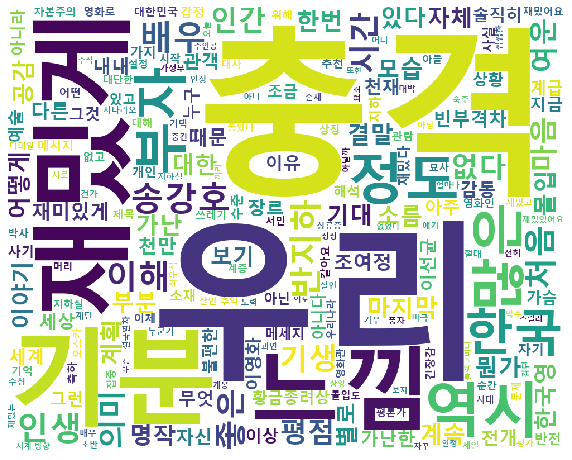

In [19]:
import matplotlib.pylab as plt
from wordcloud import WordCloud
wordcloud = WordCloud(font_path ="c://windows//Fonts/malgunbd.ttf",
                      stopwords = stopwords, # freq에서는 작동안함.
                      background_color = "white",
                      width = 1000,
                      height = 800).generate(text)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")

### 1점만 단어 추출

In [26]:
text = str(dic['1'])

### text 정제 - 명사, 형용사만 뽑기
from konlpy.tag import Okt
okt = Okt() 
pos = okt.pos(text, norm=True)

len(pos) 

## 명사 형용사만 뽑기
noun_adj = []
cn = 1
for i in tqdm_notebook(pos):
    if i[1] in ('Noun','Adjective'):
        noun_adj.append(i[0])
    cn+=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


### 1점만 wordcloud 시각화

(-0.5, 999.5, 799.5, -0.5)

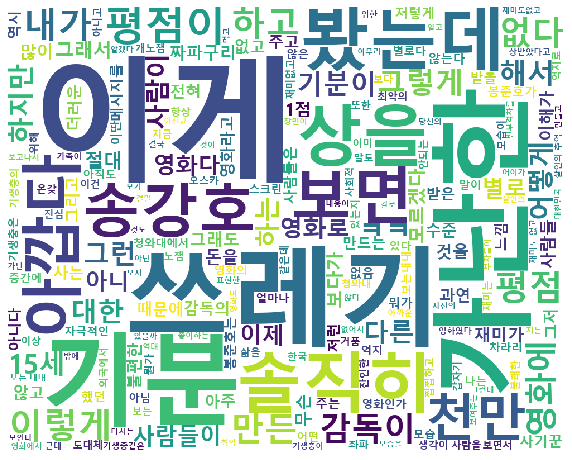

In [27]:
import matplotlib.pylab as plt
from wordcloud import WordCloud
wordcloud = WordCloud(font_path ="c://windows//Fonts/malgunbd.ttf",
                      stopwords = stopwords, # freq에서는 작동안함.
                      background_color = "white",
                      width = 1000,
                      height = 800).generate(text)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")

## Step 4. 결론
#### 10점 
- '충격', '느낌'을 받았음에도 '재밌게' 보았다는 의견들. 
- '배우', '송강호'에 대한 팬심으로 긍정적 반응도 있는 것으로 추측 가능하다.

#### 1점 
- '가난한' 이라는 단어가 많은 것으로 보아, 영화에서의 빈부격차가 부정적 의견에 한몫 한듯.
- '감독', '상을', '평점이', '천만', '솔직히' : 상을 받고 언론에 자주 비춰지는 모습때문에 오히려 부정적 인식을 더 키운 것으로도 추측 가능